In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

from sklearn.metrics import accuracy_score

## aesthetic evaluation dataset

#### load dataset

In [2]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = eduard.bonci
aesthetic_evaluation_data_eduard = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'eduard.bonci']
aesthetic_evaluation_data_eduard_objective = aesthetic_evaluation_data_eduard['Objective Evaluation']
aesthetic_evaluation_data_eduard = aesthetic_evaluation_data_eduard.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_eduard_X = aesthetic_evaluation_data_eduard.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_eduard_y = aesthetic_evaluation_data_eduard['Subjective Evaluation']

# get data from author = cmavioso
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'cmavioso']
aesthetic_evaluation_data_cmavioso_objective = aesthetic_evaluation_data_cmavioso['Objective Evaluation']
aesthetic_evaluation_data_cmavioso = aesthetic_evaluation_data_cmavioso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_cmavioso_X = aesthetic_evaluation_data_cmavioso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_cmavioso_y = aesthetic_evaluation_data_cmavioso['Subjective Evaluation']

# get data from author = mariajoaocardoso
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'mariajoaocardoso']
aesthetic_evaluation_data_mariajoaocardoso_objective = aesthetic_evaluation_data_mariajoaocardoso['Objective Evaluation']
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data_mariajoaocardoso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_mariajoaocardoso_X = aesthetic_evaluation_data_mariajoaocardoso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_mariajoaocardoso_y = aesthetic_evaluation_data_mariajoaocardoso['Subjective Evaluation']

# get all data
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [3]:
# number of observations
print(f"Number of observations: {len(aesthetic_evaluation_data)}")

# number of features
print(f"Number of features: {len(aesthetic_evaluation_data.columns)}")

# num of of obs for eduard.bonci
print(f"Number of observations for eduard.bonci: {len(aesthetic_evaluation_data_eduard)}")

# num of of obs for cmavioso
print(f"Number of observations for cmavioso: {len(aesthetic_evaluation_data_cmavioso)}")

# num of of obs for mariajoaocardoso
print(f"Number of observations for mariajoaocardoso: {len(aesthetic_evaluation_data_mariajoaocardoso)}")

Number of observations: 1358
Number of features: 23
Number of observations for eduard.bonci: 494
Number of observations for cmavioso: 237
Number of observations for mariajoaocardoso: 627


In [4]:
# distribution of the target variable
print(aesthetic_evaluation_y.value_counts())

# for eduard.bonci
print("\neduard.bonci target variable distribution:  ", aesthetic_evaluation_data_eduard_y.value_counts())

# for cmavioso
print("\ncmavioso target variable distribution:  ", aesthetic_evaluation_data_cmavioso_y.value_counts())

# for mariajoaocardoso
print("\nmariajoaocardoso target variable distribution:  ", aesthetic_evaluation_data_mariajoaocardoso_y.value_counts())

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

eduard.bonci target variable distribution:   Subjective Evaluation
Good         231
Fair         135
Excellent    106
Poor          22
Name: count, dtype: int64

cmavioso target variable distribution:   Subjective Evaluation
Good         108
Excellent     81
Fair          36
Poor          12
Name: count, dtype: int64

mariajoaocardoso target variable distribution:   Subjective Evaluation
Good         256
Fair         182
Excellent    121
Poor          68
Name: count, dtype: int64


In [5]:
# show proportion of each class
aesthetic_evaluation_y.value_counts(normalize=True)

Subjective Evaluation
Good         0.438144
Fair         0.259941
Excellent    0.226804
Poor         0.075110
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

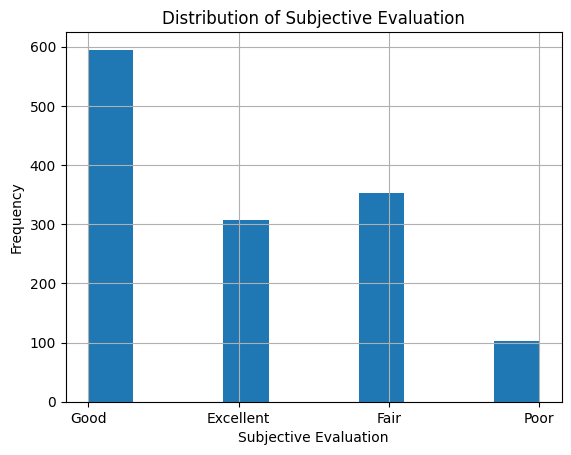

In [6]:
aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [7]:
# accuracy of 'objective evaluation' relative to target
acc = accuracy_score(aesthetic_evaluation_y, aesthetic_evaluation_objective)
print(f'Accuracy of objective evaluation: {acc}')

# accuracy of 'objective evaluation' relative to target for eduard.bonci
acc_eduard = accuracy_score(aesthetic_evaluation_data_eduard_y, aesthetic_evaluation_data_eduard_objective)
print(f'Accuracy of objective evaluation for eduard.bonci: {acc_eduard}')   

# accuracy of 'objective evaluation' relative to target for cmavioso
acc_cmavioso = accuracy_score(aesthetic_evaluation_data_cmavioso_y, aesthetic_evaluation_data_cmavioso_objective)
print(f'Accuracy of objective evaluation for cmavioso: {acc_cmavioso}') 

# accuracy of 'objective evaluation' relative to target for mariajoaocardoso
acc_mariajoaocardoso = accuracy_score(aesthetic_evaluation_data_mariajoaocardoso_y, aesthetic_evaluation_data_mariajoaocardoso_objective)
print(f'Accuracy of objective evaluation for mariajoaocardoso: {acc_mariajoaocardoso}') 


Accuracy of objective evaluation: 0.5876288659793815
Accuracy of objective evaluation for eduard.bonci: 0.5404858299595142
Accuracy of objective evaluation for cmavioso: 0.679324894514768
Accuracy of objective evaluation for mariajoaocardoso: 0.5901116427432217


In [8]:
# get categorical columns
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

# do a mapping for the ordinal target variable
mapping = {1: 'Poor', 2: 'Fair', 3: 'Good', 4: 'Excellent'}

K = 4  # number of classes

Categorical columns: []


#### CAIM & 1ook

Execution time: 15.07945990562439 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           2
1             2           2
2             4           3
3             3           2
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           4

[340 rows x 2 columns]
accuracy:  0.5558823529411765
precision:  0.5735344062153163
recall:  0.5558823529411765
f1 score:  0.5439456901279764
balanced accuracy:  0.4813925565628889
logistic loss:  0.00639213376971857
mse:  0.46176470588235297
number of far off predictions:  14
number of features:  112
number of non-zero weights:  56
model size (non-zero weights / all weights):  0.5


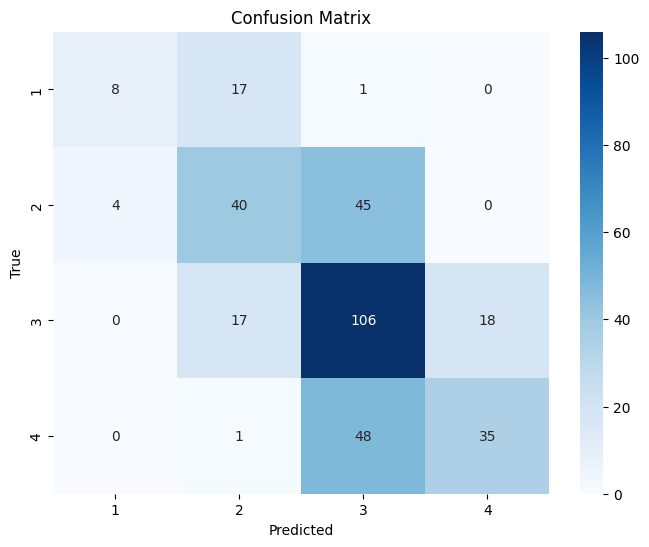

accuracy for class 1: 0.308
accuracy for class 2: 0.449
accuracy for class 3: 0.752
accuracy for class 4: 0.417

Evaluating the model on the train set...
accuracy on train set:  0.6424361493123772
precision on train set:  0.6537558704761505
recall on train set:  0.6424361493123772
f1 score on train set:  0.6318188872123716
balanced accuracy on train set:  0.6031982583360685
logistic loss on train set:  0.010176988496814598
mse on train set:  0.4056974459724951

Scorecard table:
          Feature                                           Bin    Points
0       BRA Value        [0.601883875460406, 3.997025532141979[  0.287665
1       BRA Value       [5.918237298308635, 24.075530326533293[  0.120303
2       LBC Value      [0.0004087089954772, 0.4172018007463239[  0.952908
3       LBC Value       [0.4172018007463239, 2.079932905328359[  0.273661
4       LBC Value        [3.924168105752813, 8.815417698806167[ -0.471347
5       UNR Value       [0.0468604951177561, 2.338804814964853[  0.164776

In [9]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_ml_model, aesthetic_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 1.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 14.98759388923645 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           1
1             2           2
2             4           3
3             3           2
4             3           3
..          ...         ...
335           3           2
336           3           3
337           4           3
338           4           3
339           4           4

[340 rows x 2 columns]
accuracy:  0.538235294117647
precision:  0.5505012402085407
recall:  0.538235294117647
f1 score:  0.5326506755348586
balanced accuracy:  0.48203881444079866
logistic loss:  0.007447130555267892
mse:  0.4970588235294118
number of far off predictions:  15
number of features:  112
number of non-zero weights:  107
model size (non-zero weights / all weights):  0.9553571428571429


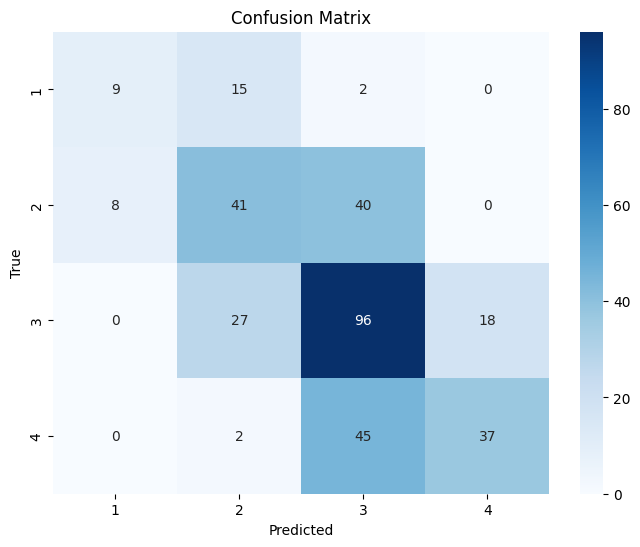

accuracy for class 1: 0.346
accuracy for class 2: 0.461
accuracy for class 3: 0.681
accuracy for class 4: 0.440

Evaluating the model on the train set...
accuracy on train set:  0.6463654223968566
precision on train set:  0.6529269487323994
recall on train set:  0.6463654223968566
f1 score on train set:  0.6399781040044749
balanced accuracy on train set:  0.614907100613468
logistic loss on train set:  0.010099204054371891
mse on train set:  0.41355599214145383

Scorecard table:
           Feature                                       Bin    Points
0        BRA Value   [0.1623383287101974, 0.601883875460406[  0.087124
1        BRA Value    [0.601883875460406, 3.997025532141979[  0.027760
2        BRA Value    [3.997025532141979, 5.918237298308635[  0.027253
3        BRA Value   [5.918237298308635, 24.075530326533293[  0.144668
4        BRA Value                 [24.075530326533293, inf[ -0.286807
..             ...                                       ...       ...
100  cEMDLab Value  

In [10]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_mm_model, aesthetic_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params = {'C': 8, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 15.248201131820679 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           2
1             2           2
2             4           3
3             3           2
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           3

[340 rows x 2 columns]
accuracy:  0.4823529411764706
precision:  0.3675626954362005
recall:  0.4823529411764706
f1 score:  0.3913875048101803
balanced accuracy:  0.35367283326284044
logistic loss:  0.0046626634173939936
mse:  0.5882352941176471
number of far off predictions:  8
number of features:  112
number of non-zero weights:  8
model size (non-zero weights / all weights):  0.07142857142857142


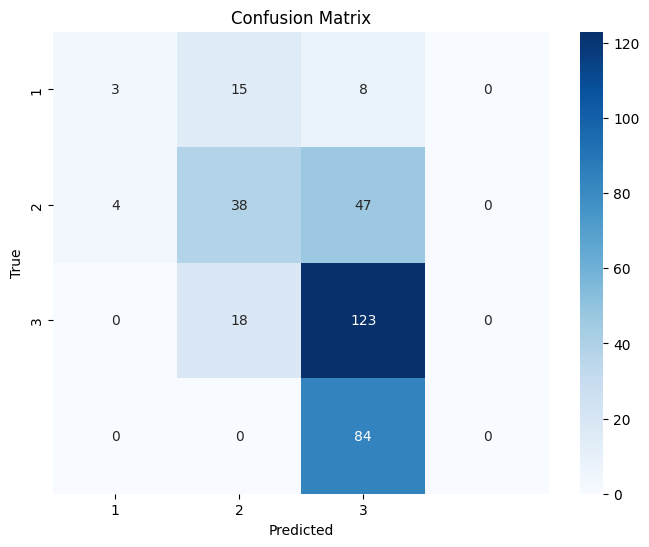

accuracy for class 1: 0.115
accuracy for class 2: 0.427
accuracy for class 3: 0.872
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.5402750491159135
precision on train set:  0.43156111554535753
recall on train set:  0.5402750491159135
f1 score on train set:  0.4539332884536383
balanced accuracy on train set:  0.40436879518580193
logistic loss on train set:  0.008519969490764608
mse on train set:  0.518664047151277

Scorecard table:
      Feature                                           Bin    Points
0   UNR Value       [0.0468604951177561, 2.338804814964853[  0.098317
1   BCD Value       [0.1056456544789919, 3.502484549081236[  0.115511
2  pLBC Value  [2.2773158381800327e-05, 0.0140286071627897[  0.351955
3  pLBC Value      [0.0140286071627897, 0.0754687169258525[  0.205701
4  pBCE Value      [0.0002450886198942, 0.3034985174100497[  0.134403
5  cX2a Value      [0.0044519770890474, 0.0695258826017379[  0.043411

SBC columns weights:
    

In [9]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_beyondl1_model, aesthetic_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 12.741954803466797 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           2
1             2           3
2             4           3
3             3           2
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           3

[340 rows x 2 columns]
accuracy:  0.5088235294117647
precision:  0.5527868699148977
recall:  0.5088235294117647
f1 score:  0.44795938375350136
balanced accuracy:  0.41138270944928845
logistic loss:  0.006868404764739852
mse:  0.5529411764705883
number of far off predictions:  13
number of features:  112
number of non-zero weights:  44
model size (non-zero weights / all weights):  0.39285714285714285


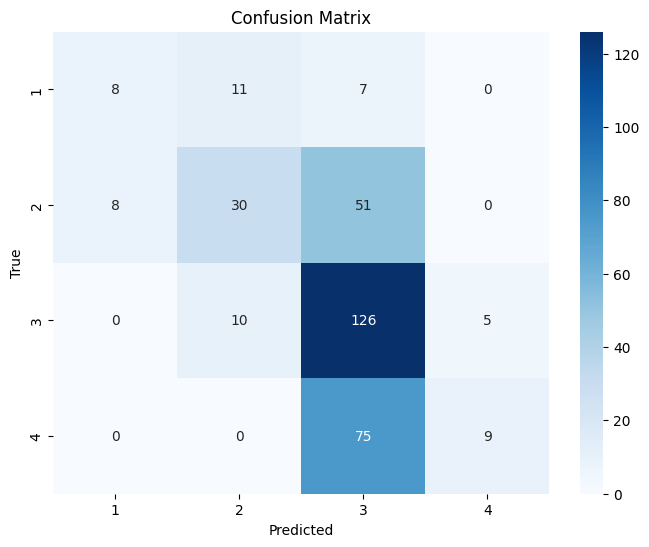

accuracy for class 1: 0.308
accuracy for class 2: 0.337
accuracy for class 3: 0.894
accuracy for class 4: 0.107

Evaluating the model on the train set...
accuracy on train set:  0.5884086444007859
precision on train set:  0.649193495079034
recall on train set:  0.5884086444007859
f1 score on train set:  0.5309958996000832
balanced accuracy on train set:  0.5058565344202517
logistic loss on train set:  0.009744163969813265
mse on train set:  0.44106090373280943

Scorecard table:
          Feature                                           Bin        Points
0       BRA Value       [0.1623383287101974, 0.601883875460406[  3.738494e-20
1       BRA Value        [0.601883875460406, 3.997025532141979[  4.692344e-02
2       LBC Value      [0.0004087089954772, 0.4172018007463239[  6.233945e-02
3       LBC Value       [0.4172018007463239, 2.079932905328359[ -2.484094e-15
4       LBC Value        [2.079932905328359, 3.924168105752813[ -1.639537e-20
5       UNR Value       [0.0468604951177561, 2.33

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_1ook_adaptivelasso_model, aesthetic_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 0.003593813663804626},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5698010238578191
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5805805080652952
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5698010238578191
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5805901671013233
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.57372259248527
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.583550661643968
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5737370810393123
testing paramet

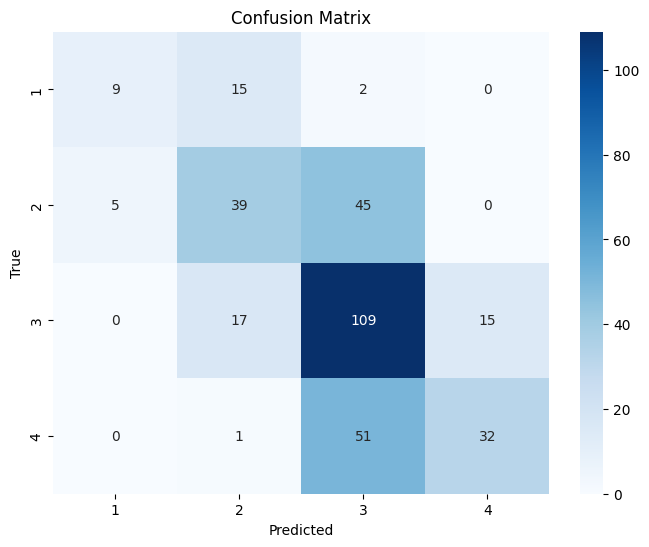

accuracy for class 1: 0.346
accuracy for class 2: 0.438
accuracy for class 3: 0.773
accuracy for class 4: 0.381

Evaluating the model on the train set...
accuracy on train set:  0.6434184675834971
precision on train set:  0.6564743733933833
recall on train set:  0.6434184675834971
f1 score on train set:  0.6309528408068443
balanced accuracy on train set:  0.6013181748549388
logistic loss on train set:  0.010142300551221011
mse on train set:  0.4106090373280943

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [0.1623383287101974, 0.601883875460406[  0.286713
1       BRA Value    [0.601883875460406, 3.997025532141979[  0.027767
2       BRA Value    [3.997025532141979, 5.918237298308635[ -0.205885
3       BRA Value   [5.918237298308635, 24.075530326533293[  0.048359
4       LBC Value  [0.0004087089954772, 0.4172018007463239[  0.302754
..            ...                                       ...       ...
67    cEMDb Value  [0.65900

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_ml_model, aesthetic_caim_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1.0, 'class_weight': None},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.35659712160726365
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3133681058630349
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4626919733410606
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.37428764609292
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4843523616343089
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5227228822563508
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  me

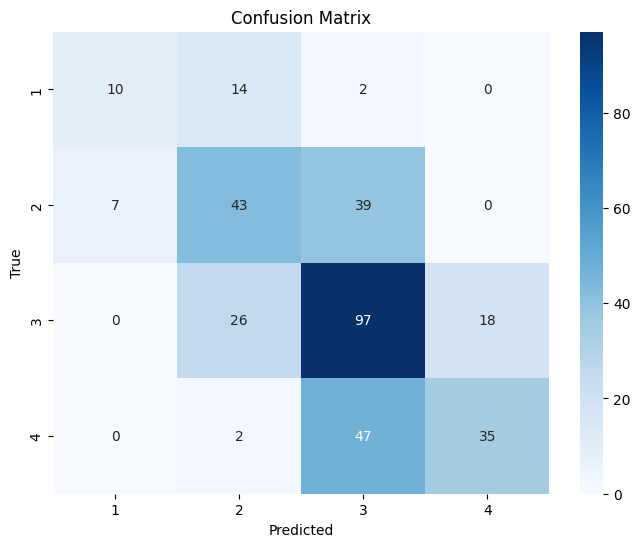

accuracy for class 1: 0.385
accuracy for class 2: 0.483
accuracy for class 3: 0.688
accuracy for class 4: 0.417

Evaluating the model on the train set...
accuracy on train set:  0.6444007858546169
precision on train set:  0.6497711819160036
recall on train set:  0.6444007858546169
f1 score on train set:  0.6374686248054623
balanced accuracy on train set:  0.6124477505839087
logistic loss on train set:  0.010279928103544219
mse on train set:  0.4155206286836935

Scorecard table:
           Feature                                       Bin        Points
0        BRA Value   [0.1623383287101974, 0.601883875460406[ -3.495870e-12
1        BRA Value    [0.601883875460406, 3.997025532141979[ -1.095407e-01
2        BRA Value    [3.997025532141979, 5.918237298308635[ -9.216247e-05
3        BRA Value   [5.918237298308635, 24.075530326533293[  1.323500e-01
4        BRA Value                 [24.075530326533293, inf[ -2.544300e-01
..             ...                                       ...       

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_mm_model, aesthetic_caim_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 16, 'class_weight': None},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 13.608084201812744 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           2
1             2           2
2             4           3
3             3           3
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           3

[340 rows x 2 columns]
accuracy:  0.47352941176470587
precision:  0.3576256818516881
recall:  0.47352941176470587
f1 score:  0.38233673008855995
balanced accuracy:  0.3567867804360752
logistic loss:  0.00696123781956057
mse:  0.5970588235294118
number of far off predictions:  9
number of features:  112
number of non-zero weights:  9
model size (non-zero weights / all weights):  0.08035714285714286


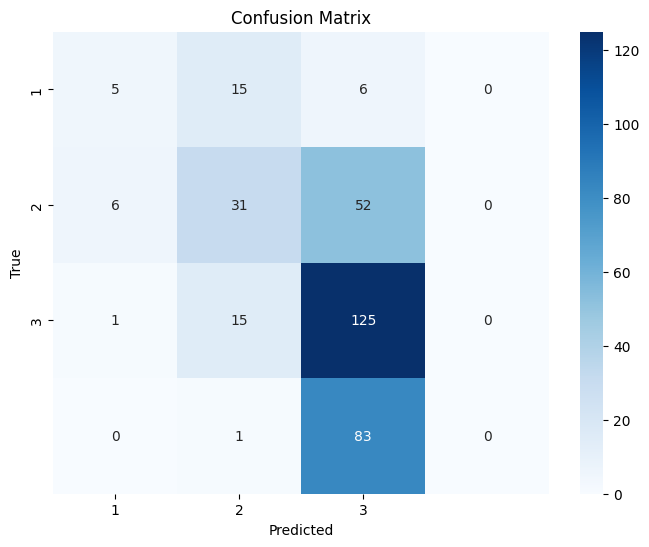

accuracy for class 1: 0.192
accuracy for class 2: 0.348
accuracy for class 3: 0.887
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.550098231827112
precision on train set:  0.44386555062072697
recall on train set:  0.550098231827112
f1 score on train set:  0.4650514255518566
balanced accuracy on train set:  0.41423480105951704
logistic loss on train set:  0.008042451386238585
mse on train set:  0.4764243614931238

Scorecard table:
       Feature                                       Bin    Points
0    LBC Value    [2.079932905328359, 3.924168105752813[ -0.150048
1   pLBC Value  [0.0140286071627897, 0.0754687169258525[ -0.146323
2   pUNR Value  [0.1208068027695054, 0.2477451980450633[ -0.129598
3   pBCE Value   [0.376402851897656, 1.9451569659865504[ -0.161638
4   pBCD Value  [0.0770201202759082, 0.1754310362984176[ -0.142251
5   pBOD Value  [0.3284043688800893, 0.4528625023229256[ -0.090892
6  cEMDL Value  [0.0813564658164978, 0.147004803

In [13]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_caim_diffcod_beyondl1_model, aesthetic_caim_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 11.997745275497437 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           2
1             2           3
2             4           3
3             3           2
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           3

[340 rows x 2 columns]
accuracy:  0.5088235294117647
precision:  0.557667824454765
recall:  0.5088235294117647
f1 score:  0.4464673258568669
balanced accuracy:  0.4035403744792939
logistic loss:  0.005965048107711423
mse:  0.5529411764705883
number of far off predictions:  10
number of features:  112
number of non-zero weights:  112
model size (non-zero weights / all weights):  1.0


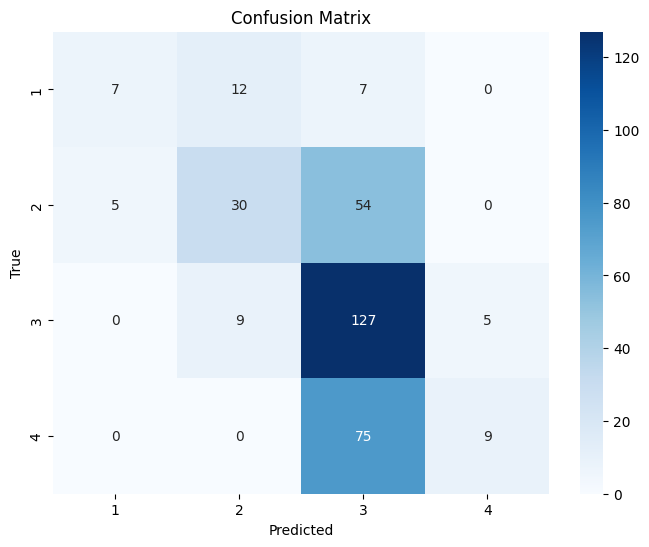

accuracy for class 1: 0.269
accuracy for class 2: 0.337
accuracy for class 3: 0.901
accuracy for class 4: 0.107

Evaluating the model on the train set...
accuracy on train set:  0.600196463654224
precision on train set:  0.6634797039919417
recall on train set:  0.600196463654224
f1 score on train set:  0.5475202996085817
balanced accuracy on train set:  0.5275694476855937
logistic loss on train set:  0.009152007486101713
mse on train set:  0.4292730844793713

Scorecard table:
           Feature                                       Bin    Points
0        BRA Value   [0.1623383287101974, 0.601883875460406[  0.064538
1        BRA Value    [0.601883875460406, 3.997025532141979[  0.045757
2        BRA Value    [3.997025532141979, 5.918237298308635[ -0.022728
3        BRA Value   [5.918237298308635, 24.075530326533293[  0.027051
4        BRA Value                 [24.075530326533293, inf[ -0.041311
..             ...                                       ...       ...
105  cEMDLab Value  [0

In [10]:
start_time = time.time()

scorecard = Scorecard()

aesthetic_caim_diffcod_adaptivelasso_model, aesthetic_caim_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-08},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4764512701632377
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.48232879358640013
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44991789819376027
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4499661933739013
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4853424128271998
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4951366753597991
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.45283009755626386
testing p

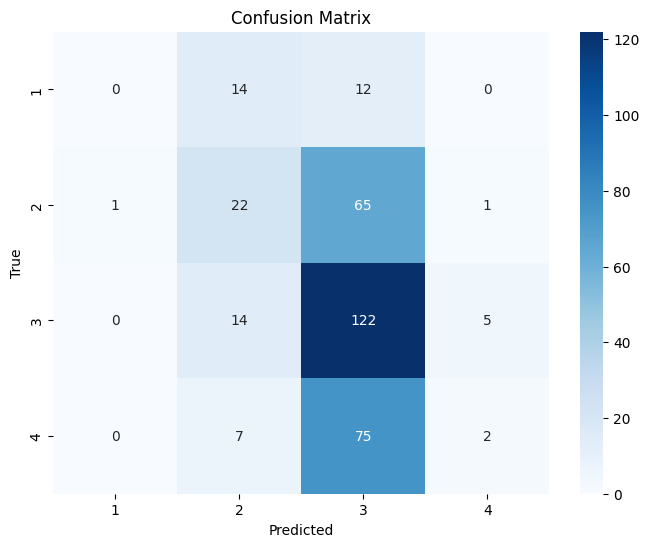

accuracy for class 1: 0.000
accuracy for class 2: 0.247
accuracy for class 3: 0.865
accuracy for class 4: 0.024

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.011557402287142998
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.102679
1          BRA Value  [0.20882918670067196, 0.21511673901980122[ -0.426268
2          BRA Value  [0.21511673901980122, 0.23356299924095925[ -0.572736
3          BRA Value  [0.23356299924095925, 0.25998993666774833[ -0.022644
4          BRA Value  [0.25998993666774833, 0.26979525183184316[ -0.380461
...              ...                                         ...       ...
11168  cEMDLab Value     [0.609410512476939, 0.6209906983832364[ -0.337713
11169  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_ml_model, aesthetic_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 10.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16092436974789917
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2200328407224959
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.44601564763836576
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5

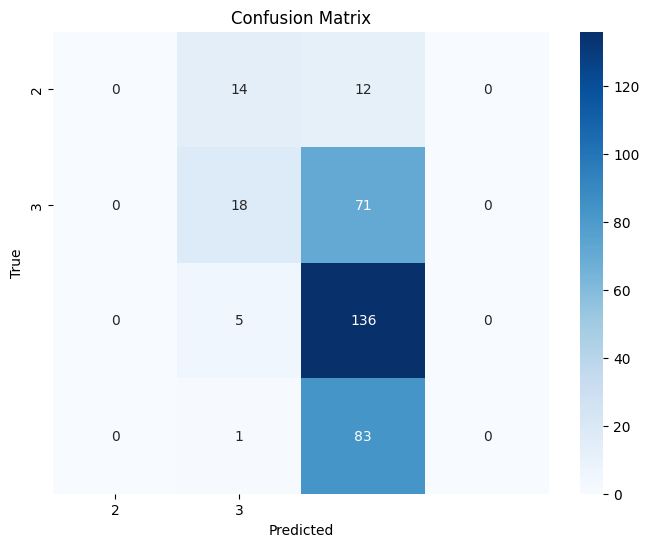

accuracy for class 1: 0.000
accuracy for class 2: 0.202
accuracy for class 3: 0.965
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.011557402287142998
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.108015
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.017106
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.108006
3          BRA Value  [0.20882918670067196, 0.21511673901980122[ -0.164706
4          BRA Value  [0.21511673901980122, 0.23356299924095925[ -0.164694
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.017109
22370  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_mm_model, aesthetic_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params={'C': 4, 'class_weight': 'balanced'},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 2.4288172721862793 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           3
1             2           3
2             4           3
3             3           3
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           3

[340 rows x 2 columns]
accuracy:  0.4147058823529412
precision:  0.1719809688581315
recall:  0.4147058823529412
f1 score:  0.2431331784272961
balanced accuracy:  0.25
logistic loss:  0.0031332937087616445
mse:  0.8147058823529412
number of far off predictions:  4
number of features:  22376
number of non-zero weights:  2
model size (non-zero weights / all weights):  8.93814801573114e-05


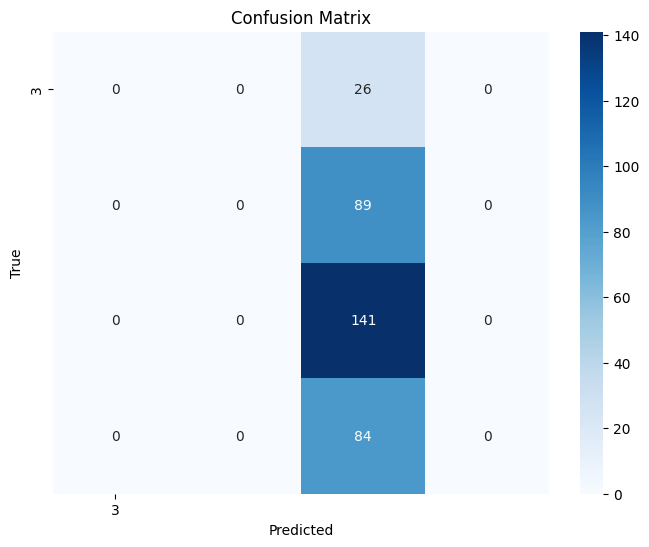

accuracy for class 1: 0.000
accuracy for class 2: 0.000
accuracy for class 3: 1.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.44597249508840864
precision on train set:  0.19889146637538066
recall on train set:  0.44597249508840864
f1 score on train set:  0.2750971640898607
balanced accuracy on train set:  0.25
logistic loss on train set:  0.0040937633832641785
mse on train set:  0.7779960707269156

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
               Feature    Weight
22374  featsbcol1-bin1 -0.258554
22375  featsbcol2-bin1 -0.704526


In [12]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_beyondl1_model, aesthetic_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 40.26543307304382 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           2
1             2           3
2             4           3
3             3           2
4             3           3
..          ...         ...
335           3           2
336           3           3
337           4           3
338           4           3
339           4           3

[340 rows x 2 columns]
accuracy:  0.4294117647058823
precision:  0.32067316766278703
recall:  0.4294117647058823
f1 score:  0.3381861478441506
balanced accuracy:  0.35489956294402863
logistic loss:  0.00941787989573136
mse:  0.7794117647058824
number of far off predictions:  13
number of features:  22376
number of non-zero weights:  22376
model size (non-zero weights / all weights):  1.0


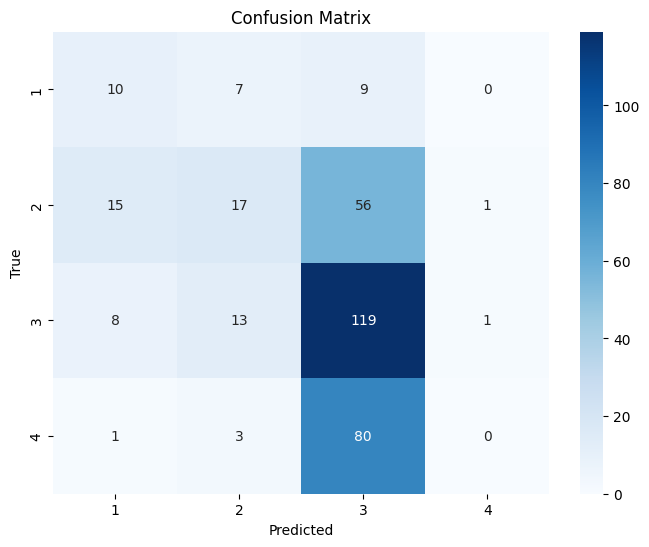

accuracy for class 1: 0.385
accuracy for class 2: 0.191
accuracy for class 3: 0.844
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7406679764243614
precision on train set:  0.6826996417427482
recall on train set:  0.7406679764243614
f1 score on train set:  0.6932900105788121
balanced accuracy on train set:  0.75
logistic loss on train set:  0.027479987046840754
mse on train set:  0.2593320235756385

Scorecard table:
             Feature                                         Bin        Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  4.935704e-02
1          BRA Value    [0.189619931322902, 0.20154489666341896[  3.417248e-02
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  4.935704e-02
3          BRA Value  [0.20882918670067196, 0.21511673901980122[ -4.537810e-08
4          BRA Value  [0.21511673901980122, 0.23356299924095925[ -4.537810e-08
...              ...                                     

In [11]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_1ook_adaptivelasso_model, aesthetic_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 0.0002782559402207126},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5069931420844199
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5001110789143244
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.49916449338356034
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5040761132039023
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5060127499275573
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5011156186612575
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5070028011204482
testing par

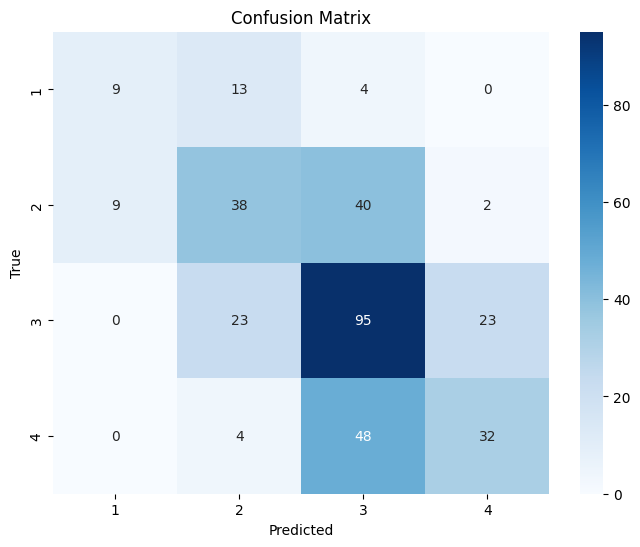

accuracy for class 1: 0.346
accuracy for class 2: 0.427
accuracy for class 3: 0.674
accuracy for class 4: 0.381

Evaluating the model on the train set...
accuracy on train set:  0.9636542239685658
precision on train set:  0.9644555686751222
recall on train set:  0.9636542239685658
f1 score on train set:  0.9635863477443363
balanced accuracy on train set:  0.9584575582177309
logistic loss on train set:  0.011588620336984051
mse on train set:  0.036345776031434185

Scorecard table:
            Feature                                         Bin    Points
0         BRA Value  [0.25998993666774833, 0.26979525183184316[  0.218394
1         BRA Value    [0.284913290130897, 0.29489299511289246[  0.011870
2         BRA Value    [0.3136842659973549, 0.3244746116292725[  0.145382
3         BRA Value     [0.520378007902174, 0.5243768810667505[  0.101890
4         BRA Value    [0.5266390394944898, 0.5276260605099737[  0.122349
...             ...                                         ...       .

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_ml_model, aesthetic_infbins_diffcod_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1.0, 'class_weight': 'balanced'},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.36147493480150683
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.33005409060175794
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4047522457258766
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3733120834540713
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4323143050323578
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4391577320583406
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
 

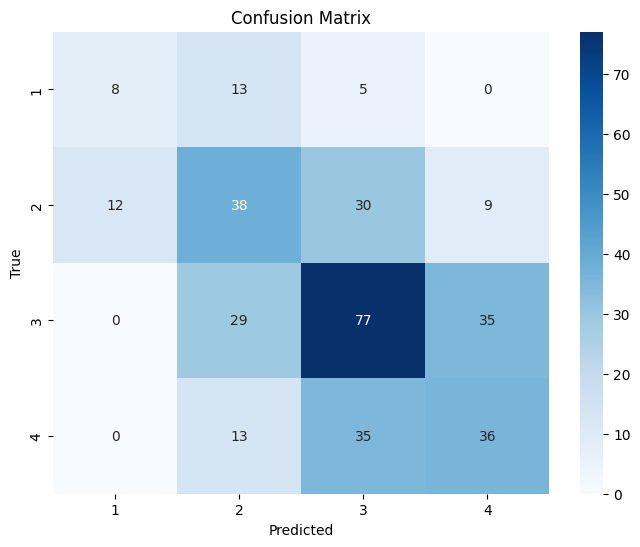

accuracy for class 1: 0.308
accuracy for class 2: 0.427
accuracy for class 3: 0.546
accuracy for class 4: 0.429

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.011557402287142998
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[ -0.003284
1          BRA Value    [0.189619931322902, 0.20154489666341896[ -0.009129
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.006563
3          BRA Value  [0.20882918670067196, 0.21511673901980122[ -0.009873
4          BRA Value  [0.21511673901980122, 0.23356299924095925[ -0.006487
...              ...                                         ...       ...
22366  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.016998
22367  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_mm_model, aesthetic_infbins_diffcod_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0625, 'class_weight': 'balanced'},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.8273940086364746 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           2
1             2           3
2             4           3
3             3           3
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           3
339           4           3

[340 rows x 2 columns]
accuracy:  0.5205882352941177
precision:  0.5422712418300654
recall:  0.5205882352941177
f1 score:  0.4892183427370563
balanced accuracy:  0.434450142255545
logistic loss:  0.006511326814620774
mse:  0.5852941176470589
number of far off predictions:  12
number of features:  22376
number of non-zero weights:  11
model size (non-zero weights / all weights):  0.0004915981408652127


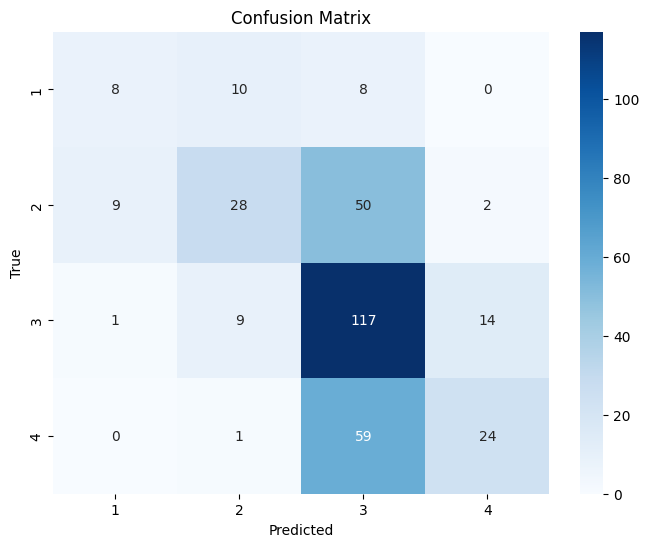

accuracy for class 1: 0.308
accuracy for class 2: 0.315
accuracy for class 3: 0.830
accuracy for class 4: 0.286

Evaluating the model on the train set...
accuracy on train set:  0.593320235756385
precision on train set:  0.630562076323823
recall on train set:  0.593320235756385
f1 score on train set:  0.5546480969693623
balanced accuracy on train set:  0.5413283612640933
logistic loss on train set:  0.009829731480759885
mse on train set:  0.44695481335952847

Scorecard table:
         Feature                                             Bin    Points
0      LBC Value        [1.2617491702035042, 1.2621249629939162[ -0.078050
1      UNR Value          [1.434493807117947, 1.439389569623934[ -0.087579
2     pLBC Value     [0.017291331526655948, 0.01737089364045845[ -0.108313
3     pLBC Value        [0.0989109452367268, 0.0994016632855631[ -0.203499
4     pBCE Value        [0.2800130015524612, 0.2811095285109518[ -0.120206
5     pBCD Value      [0.07643691753421339, 0.07651845015916545[ -0.0

In [16]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_beyondl1_model, aesthetic_infbins_diffcod_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 179.70354509353638 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             2           1
1             2           3
2             4           2
3             3           2
4             3           3
..          ...         ...
335           3           3
336           3           3
337           4           3
338           4           2
339           4           4

[340 rows x 2 columns]
accuracy:  0.47352941176470587
precision:  0.4701110834628368
recall:  0.47352941176470587
f1 score:  0.45679833875108744
balanced accuracy:  0.4039203136890203
logistic loss:  0.007241531984503879
mse:  0.7029411764705882
number of far off predictions:  14
number of features:  22376
number of non-zero weights:  22376
model size (non-zero weights / all weights):  1.0


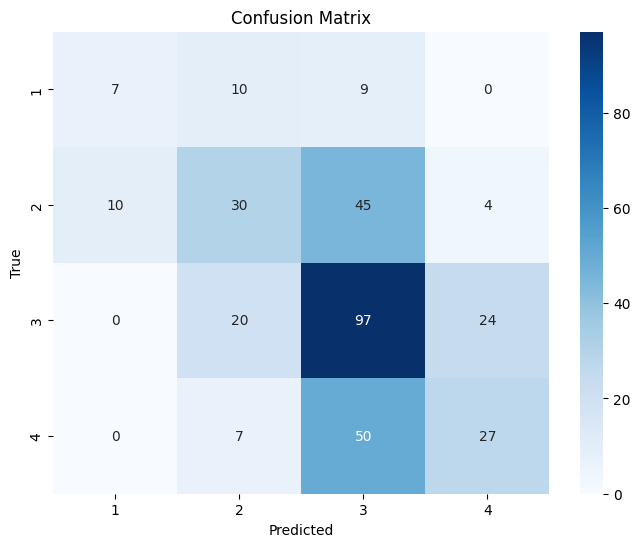

accuracy for class 1: 0.269
accuracy for class 2: 0.337
accuracy for class 3: 0.688
accuracy for class 4: 0.321

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.011557402287142998
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.007071
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.005083
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.006991
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  0.002959
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  0.002978
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.003110
22370  

In [12]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_infbins_diffcod_adaptivelasso_model, aesthetic_infbins_diffcod_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-08},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## aesthetic evaluation - mariajoaocardoso

#### load dataset

In [13]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']

# get data from author = mariajoaocardoso
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data[aesthetic_evaluation_data['Author'] == 'mariajoaocardoso']
aesthetic_evaluation_data_mariajoaocardoso_objective = aesthetic_evaluation_data_mariajoaocardoso['Objective Evaluation']
aesthetic_evaluation_data_mariajoaocardoso = aesthetic_evaluation_data_mariajoaocardoso.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_data_mariajoaocardoso_X = aesthetic_evaluation_data_mariajoaocardoso.drop(columns='Subjective Evaluation')
aesthetic_evaluation_data_mariajoaocardoso_y = aesthetic_evaluation_data_mariajoaocardoso['Subjective Evaluation']

aesthetic_evaluation_data_mariajoaocardoso.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
25,Excellent,0.907404,0.557791,0.302415,0.860206,0.797258,0.820550,18.727289,0.038721,0.020296,...,0.004186,0.095540,0.045646,0.011475,0.063262,0.032373,0.328394,0.054342,0.239879,0.047714
31,Good,2.524375,1.584148,1.310486,0.273662,4.371684,45.362978,45.436326,0.098150,0.060458,...,0.184426,0.184724,0.326105,0.019998,0.403231,0.177090,2.934267,0.078555,0.382433,0.362693
39,Good,1.926107,0.172634,1.085966,1.258600,2.037011,26.312077,51.113868,0.078396,0.006436,...,0.109172,0.212078,0.170531,0.017024,0.019105,0.150329,1.360799,0.059965,0.140586,0.221220
47,Good,1.160223,0.848648,1.102992,0.254344,1.456645,35.670280,36.845525,0.043506,0.031669,...,0.139892,0.144501,0.100803,0.023755,0.014238,0.075450,1.214374,0.029305,0.063709,0.163396
53,Excellent,0.404859,0.624045,0.144199,0.768244,0.074132,6.992305,44.692069,0.018632,0.025977,...,0.044031,0.281429,0.065029,0.044830,0.061239,0.049950,0.559824,0.066418,0.176973,0.082382


In [14]:
print(f"Number of features: {len(aesthetic_evaluation_data_mariajoaocardoso.columns)}")

print(f"Number of observations for mariajoaocardoso: {len(aesthetic_evaluation_data_mariajoaocardoso)}")

print("\nmariajoaocardoso target variable distribution:  ", aesthetic_evaluation_data_mariajoaocardoso_y.value_counts())

acc_mariajoaocardoso = accuracy_score(aesthetic_evaluation_data_mariajoaocardoso_y, aesthetic_evaluation_data_mariajoaocardoso_objective)
print(f'Accuracy of objective evaluation for mariajoaocardoso: {acc_mariajoaocardoso}') 


Number of features: 23
Number of observations for mariajoaocardoso: 627

mariajoaocardoso target variable distribution:   Subjective Evaluation
Good         256
Fair         182
Excellent    121
Poor          68
Name: count, dtype: int64
Accuracy of objective evaluation for mariajoaocardoso: 0.5901116427432217


In [15]:
# get categorical columns
categorical_columns = aesthetic_evaluation_data_mariajoaocardoso_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_data_mariajoaocardoso_X[col] = aesthetic_evaluation_data_mariajoaocardoso_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_data_mariajoaocardoso_X[col].unique()}")

# do a mapping for the ordinal target variable
mapping = {1: 'Poor', 2: 'Fair', 3: 'Good', 4: 'Excellent'}

K = 4  # number of classes

Categorical columns: []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5851063829787234
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5936170212765959
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5872340425531914
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5936170212765959
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5851063829787234
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5957446808510639
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5851063829787234
testing para

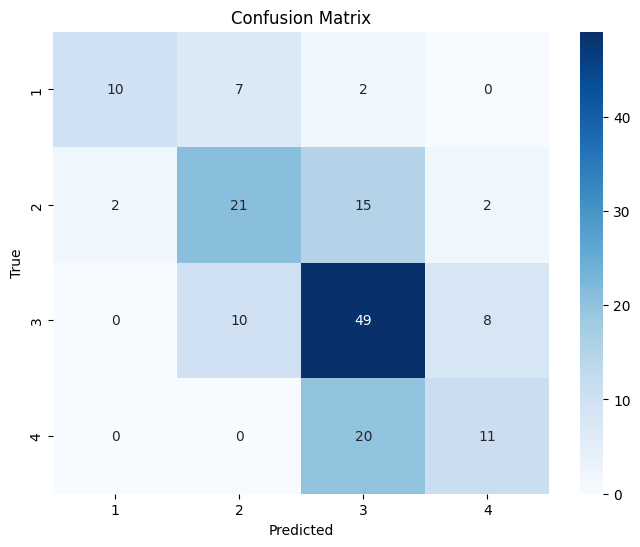

accuracy for class 1: 0.526
accuracy for class 2: 0.525
accuracy for class 3: 0.731
accuracy for class 4: 0.355

Evaluating the model on the train set...
accuracy on train set:  0.7
precision on train set:  0.7123933165043876
recall on train set:  0.7
f1 score on train set:  0.6958335389474711
balanced accuracy on train set:  0.6860083783122013
logistic loss on train set:  0.016211036276699675
mse on train set:  0.3127659574468085

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value  [0.1023505717256087, 0.5855899119784602[  1.946664
1       BRA Value   [6.001724858006494, 24.075530326533293[  0.023328
2       LBC Value   [0.002679215080719, 0.3448229773793171[  0.896826
3       LBC Value   [0.3448229773793171, 2.260081127476215[  0.531273
4       LBC Value   [2.260081127476215, 4.5051300008853685[ -0.570000
..            ...                                       ...       ...
57    cEMDb Value                  [4.141584396362305, in

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_1ook_ml_model, aesthetic_mariajoaocardoso_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 2.5, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3148936170212766
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.28510638297872337
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3425531914893617
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3127659574468085
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.42340425531914894
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3638297872340425
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
 

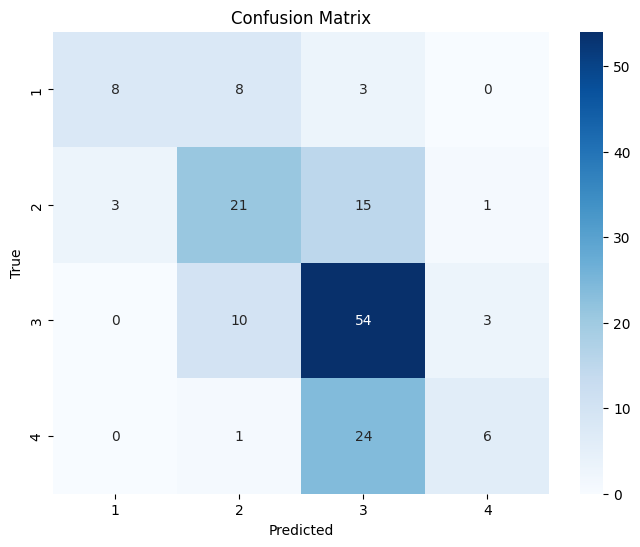

accuracy for class 1: 0.421
accuracy for class 2: 0.525
accuracy for class 3: 0.806
accuracy for class 4: 0.194

Evaluating the model on the train set...
accuracy on train set:  0.6659574468085107
precision on train set:  0.6915720393287461
recall on train set:  0.6659574468085107
f1 score on train set:  0.6496020219674763
balanced accuracy on train set:  0.6309340167992079
logistic loss on train set:  0.01759748159254909
mse on train set:  0.3595744680851064

Scorecard table:
           Feature                                       Bin    Points
0        BRA Value  [0.1023505717256087, 0.5855899119784602[  0.349926
1        BRA Value  [0.5855899119784602, 3.3868195393092537[ -0.187687
2        BRA Value   [3.3868195393092537, 6.001724858006494[ -0.004003
3        BRA Value   [6.001724858006494, 24.075530326533293[  0.038909
4        BRA Value                 [24.075530326533293, inf[ -0.197145
..             ...                                       ...       ...
100  cEMDLab Value  [

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_1ook_mm_model, aesthetic_mariajoaocardoso_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params={'C': 0.25, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 2.8535590171813965 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             3           3
1             2           3
2             4           4
3             3           3
4             2           2
..          ...         ...
152           4           3
153           3           3
154           4           3
155           3           3
156           3           3

[157 rows x 2 columns]
accuracy:  0.5414012738853503
precision:  0.596358610743901
recall:  0.5414012738853503
f1 score:  0.4867099121925504
balanced accuracy:  0.4207616944986443
logistic loss:  0.0007114729267250941
mse:  0.535031847133758
number of far off predictions:  0
number of features:  112
number of non-zero weights:  12
model size (non-zero weights / all weights):  0.10714285714285714


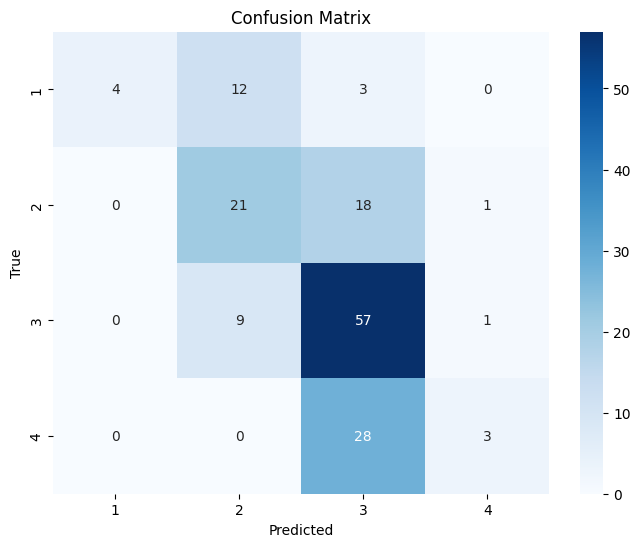

accuracy for class 1: 0.211
accuracy for class 2: 0.525
accuracy for class 3: 0.851
accuracy for class 4: 0.097

Evaluating the model on the train set...
accuracy on train set:  0.6
precision on train set:  0.6179820914684201
recall on train set:  0.6
f1 score on train set:  0.5620640219930102
balanced accuracy on train set:  0.5032629640275516
logistic loss on train set:  0.015319679121027241
mse on train set:  0.4319148936170213

Scorecard table:
        Feature                                          Bin    Points
0     BRA Value     [0.5855899119784602, 3.3868195393092537[ -0.037049
1     LBC Value      [0.002679215080719, 0.3448229773793171[  0.337260
2    pBRA Value     [0.0241532005342436, 0.1381725328658524[  0.067494
3    pLBC Value     [0.0137846926683584, 0.0746867617335732[  0.175823
4    pUNR Value  [2.752699101160613e-05, 0.1183440572003811[  0.106536
5    pBCE Value     [0.0005891695542057, 0.4045602968326292[  0.169694
6    pBCD Value     [0.0001426824823106, 0.0770201

In [23]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_1ook_beyondl1_model, aesthetic_mariajoaocardoso_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5595744680851064
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5595744680851064
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5595744680851064
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5595744680851064
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 0.0004432624113475177 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 1.00 0.00]
 ...
 [0.00 1.00 ... 1.00 0.00]
 [0.00 1.00 ... 0.00 1.00]] @ var5491 + -[1. 1. 0. ... 1. 1. 0.], 1.0) + norm1(param5493 @ var5491) is infeasible.
  fold  2
AdaptiveLasso infeasible: minimize 0.0004432624113475177 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 1.00 0

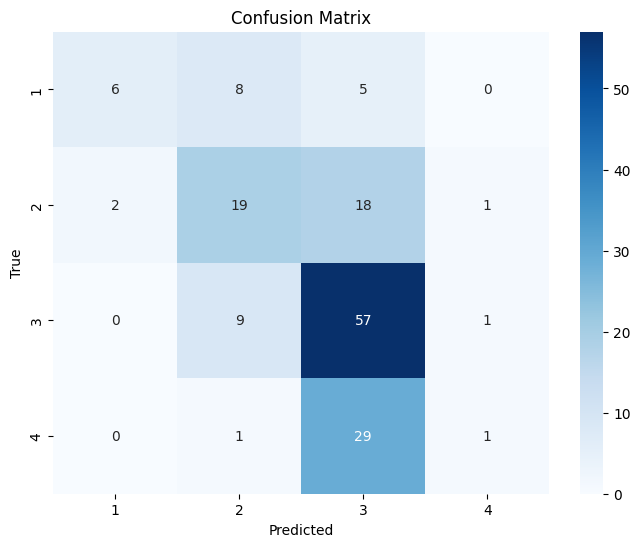

accuracy for class 1: 0.316
accuracy for class 2: 0.475
accuracy for class 3: 0.851
accuracy for class 4: 0.032

Evaluating the model on the train set...
accuracy on train set:  0.648936170212766
precision on train set:  0.6886774698496898
recall on train set:  0.648936170212766
f1 score on train set:  0.6249282178700704
balanced accuracy on train set:  0.5876326743529963
logistic loss on train set:  0.016227968674814318
mse on train set:  0.3702127659574468

Scorecard table:
           Feature                                       Bin        Points
0        BRA Value  [0.1023505717256087, 0.5855899119784602[  5.843428e-20
1        BRA Value  [0.5855899119784602, 3.3868195393092537[ -6.136919e-19
2        BRA Value   [3.3868195393092537, 6.001724858006494[  4.955918e-18
3        BRA Value   [6.001724858006494, 24.075530326533293[  6.088645e-19
4        BRA Value                 [24.075530326533293, inf[  1.297731e-21
..             ...                                       ...         

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_1ook_adaptivelasso_model, aesthetic_mariajoaocardoso_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 0.003593813663804626},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5808510638297874
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5914893617021277
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5893617021276596
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5914893617021277
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5851063829787234
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5936170212765959
testing parameters: {'C': 2

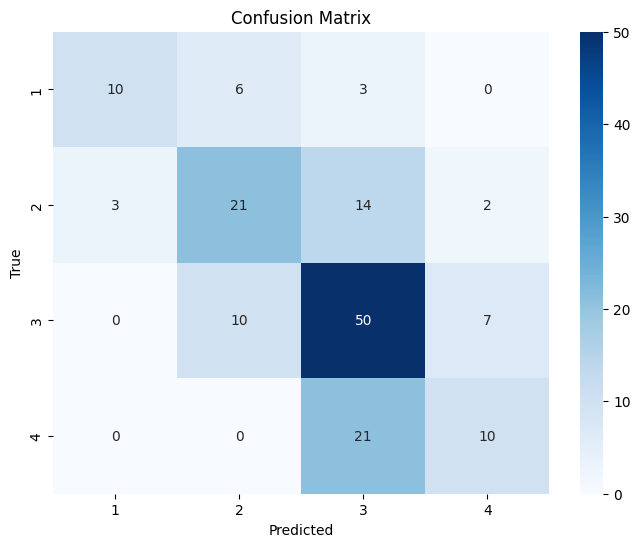

accuracy for class 1: 0.526
accuracy for class 2: 0.525
accuracy for class 3: 0.746
accuracy for class 4: 0.323

Evaluating the model on the train set...
accuracy on train set:  0.6978723404255319
precision on train set:  0.7113230913826836
recall on train set:  0.6978723404255319
f1 score on train set:  0.6936486278831363
balanced accuracy on train set:  0.6804685254383445
logistic loss on train set:  0.016211036276699675
mse on train set:  0.3148936170212766

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value  [0.1023505717256087, 0.5855899119784602[  0.414652
1       BRA Value  [0.5855899119784602, 3.3868195393092537[ -1.806415
2       BRA Value   [3.3868195393092537, 6.001724858006494[ -0.010174
3       BRA Value   [6.001724858006494, 24.075530326533293[  0.266483
4       LBC Value   [0.002679215080719, 0.3448229773793171[  0.250194
..            ...                                       ...       ...
84    cEMDb Value          

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_diff_ml_model, aesthetic_mariajoaocardoso_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='ML',
                 params={'C': 2.5, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3021276595744681
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.28085106382978725
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.34893617021276596
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30425531914893617
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.43617021276595747
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3638297872340425
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5

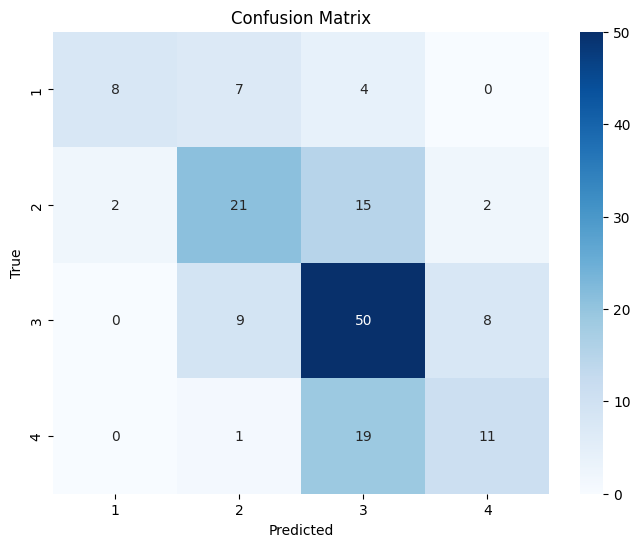

accuracy for class 1: 0.421
accuracy for class 2: 0.525
accuracy for class 3: 0.746
accuracy for class 4: 0.355

Evaluating the model on the train set...
accuracy on train set:  0.6723404255319149
precision on train set:  0.6906043007242909
recall on train set:  0.6723404255319149
f1 score on train set:  0.6659558770291187
balanced accuracy on train set:  0.6487315426953253
logistic loss on train set:  0.0171063328671732
mse on train set:  0.35319148936170214

Scorecard table:
           Feature                                       Bin        Points
0        BRA Value  [0.1023505717256087, 0.5855899119784602[  3.524958e-14
1        BRA Value  [0.5855899119784602, 3.3868195393092537[ -5.591957e-01
2        BRA Value   [3.3868195393092537, 6.001724858006494[  1.124508e-01
3        BRA Value   [6.001724858006494, 24.075530326533293[ -6.209520e-02
4        BRA Value                 [24.075530326533293, inf[ -9.026488e-02
..             ...                                       ...        

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_diff_mm_model, aesthetic_mariajoaocardoso_caim_diff_mm_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 params={'C': 0.5, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


Execution time: 937.7828719615936 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             3           3
1             2           3
2             4           3
3             3           3
4             2           2
..          ...         ...
152           4           3
153           3           3
154           4           3
155           3           3
156           3           3

[157 rows x 2 columns]
accuracy:  0.5159235668789809
precision:  0.42631915818320193
recall:  0.5159235668789809
f1 score:  0.4388041540907783
balanced accuracy:  0.3921887274155538
logistic loss:  0.0007114729267250941
mse:  0.5222929936305732
number of far off predictions:  0
number of features:  112
number of non-zero weights:  10
model size (non-zero weights / all weights):  0.08928571428571429


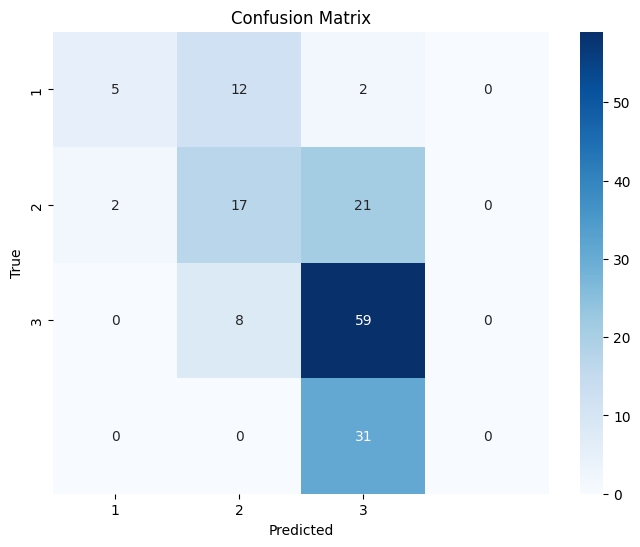

accuracy for class 1: 0.263
accuracy for class 2: 0.425
accuracy for class 3: 0.881
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.5957446808510638
precision on train set:  0.5107135183601083
recall on train set:  0.5957446808510638
f1 score on train set:  0.5243913243429684
balanced accuracy on train set:  0.5110544217687074
logistic loss on train set:  0.016188281610364976
mse on train set:  0.41702127659574467

Scorecard table:
       Feature                                       Bin    Points
0    LBC Value   [0.3448229773793171, 2.260081127476215[ -0.160998
1    LBC Value   [2.260081127476215, 4.5051300008853685[ -0.174324
2    UNR Value    [2.600136693434864, 5.757190981846652[ -0.136813
3    BCE Value    [3.117831400722004, 4.002515994399969[ -0.241422
4   pBCD Value  [0.0770201202759082, 0.1096707202349257[ -0.149601
5   cX2L Value  [0.1177562028169632, 0.2881297171115875[ -0.034095
6  cEMDL Value   [0.1339443723360697, 2.0082394

In [27]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_diff_beyondl1_model, aesthetic_mariajoaocardoso_caim_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340424
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340424
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340424
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340424
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
AdaptiveLasso infeasible: minimize 0.0004432624113475177 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 1.00 0.00]
 ...
 [1.00 1.00 ... 1.00 0.00]
 [1.00 1.00 ... 0.00 1.00]] @ var7831 + -[1. 1. 0. ... 1. 1. 0.], 1.0) + norm1(param7833 @ var7831) is infeasible.
  fold  3
  fold  4
  fold  5
  mean score: 0.4468085106382979
testing parameters: {'alpha': 0.003593813663804626}
  fold 

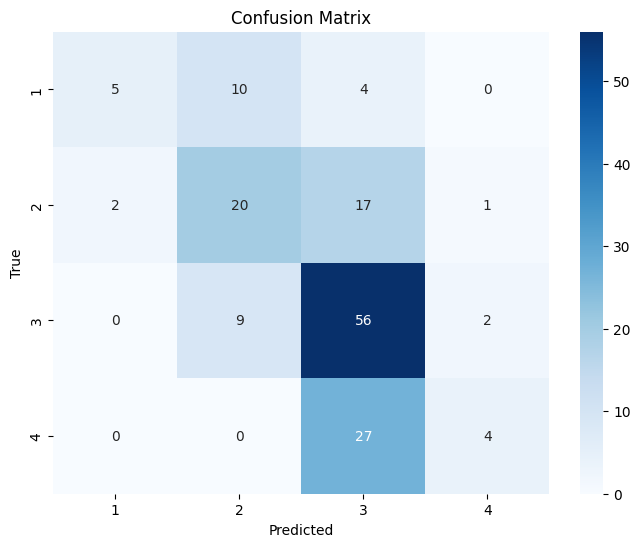

accuracy for class 1: 0.263
accuracy for class 2: 0.500
accuracy for class 3: 0.836
accuracy for class 4: 0.129

Evaluating the model on the train set...
accuracy on train set:  0.6553191489361702
precision on train set:  0.7101001802307891
recall on train set:  0.6553191489361702
f1 score on train set:  0.6279308584496935
balanced accuracy on train set:  0.5981359053793662
logistic loss on train set:  0.01505062649821998
mse on train set:  0.3574468085106383

Scorecard table:
           Feature                                       Bin        Points
0        BRA Value  [0.1023505717256087, 0.5855899119784602[  8.830783e-02
1        BRA Value  [0.5855899119784602, 3.3868195393092537[  7.987903e-21
2        BRA Value   [3.3868195393092537, 6.001724858006494[  4.351984e-20
3        BRA Value   [6.001724858006494, 24.075530326533293[  2.347915e-19
4        BRA Value                 [24.075530326533293, inf[  4.281585e-21
..             ...                                       ...        

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_caim_diff_adaptivelasso_model, aesthetic_mariajoaocardoso_caim_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 0.003593813663804626},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.48936170212765956
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.48723404255319147
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.4829787234042554
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.48085106382978726
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.46808510638297873
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5021276595744681
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.451063829787234
testing p

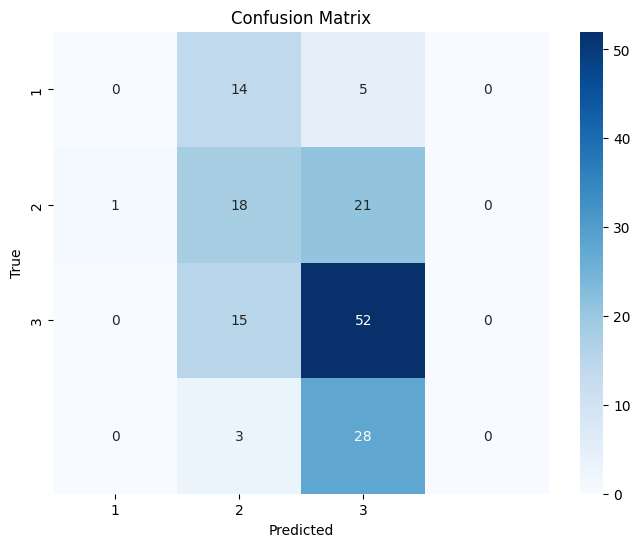

accuracy for class 1: 0.000
accuracy for class 2: 0.450
accuracy for class 3: 0.776
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.018559391050957417
mse on train set:  0.0

Scorecard table:
            Feature                                        Bin    Points
0         BRA Value  [0.3107575880267366, 0.32186438324311417[  0.063145
1         BRA Value  [0.33380354583410704, 0.3640572276620645[ -0.048212
2         BRA Value  [0.48549921773194515, 0.5352024592342317[  0.002673
3         BRA Value   [0.5526533705017165, 0.5671751922000701[  0.014776
4         BRA Value   [0.5773645017271535, 0.5824289071993816[  0.975433
...             ...                                        ...       ...
5835  cEMDLab Value   [0.5160786385865728, 0.5254261800611874[  0.000015
5836  cEMDLab Value   [

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_infbins_1ook_ml_model, aesthetic_mariajoaocardoso_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 10.0, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.13404255319148933
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.19148936170212766
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.13404255319148933
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.19148936170212766
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.40212765957446817
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.2702127659574468
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  

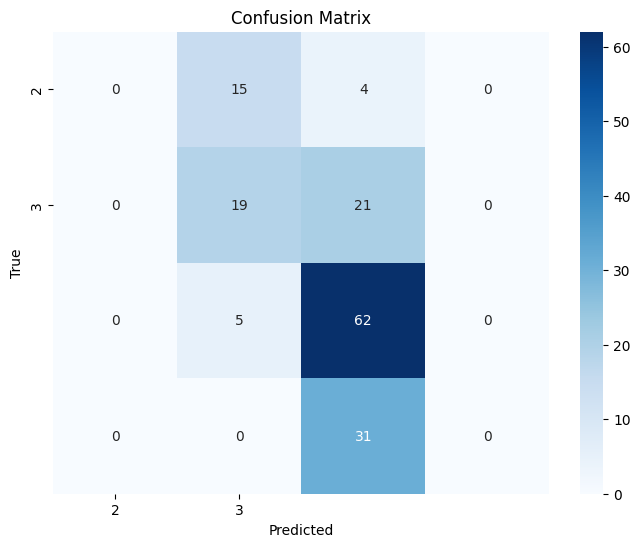

accuracy for class 1: 0.000
accuracy for class 2: 0.475
accuracy for class 3: 0.925
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.018559391050957417
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value  [0.13273382145639526, 0.23406307365458873[  0.029005
1          BRA Value   [0.23406307365458873, 0.3107575880267366[  0.029005
2          BRA Value   [0.3107575880267366, 0.32186438324311417[  0.119896
3          BRA Value  [0.32186438324311417, 0.33380354583410704[  0.029015
4          BRA Value   [0.33380354583410704, 0.3640572276620645[ -0.061898
...              ...                                         ...       ...
10313  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.029002
10314  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_infbins_1ook_mm_model, aesthetic_mariajoaocardoso_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params={'C': 0.25, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


Execution time: 0.1720731258392334 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             3           3
1             2           3
2             4           3
3             3           3
4             2           3
..          ...         ...
152           4           3
153           3           3
154           4           3
155           3           3
156           3           3

[157 rows x 2 columns]
accuracy:  0.4267515923566879
precision:  0.18211692157896872
recall:  0.4267515923566879
f1 score:  0.2552888989990901
balanced accuracy:  0.25
logistic loss:  0.0007114729267250941
mse:  0.9363057324840764
number of far off predictions:  0
number of features:  10320
number of non-zero weights:  2
model size (non-zero weights / all weights):  0.0001937984496124031


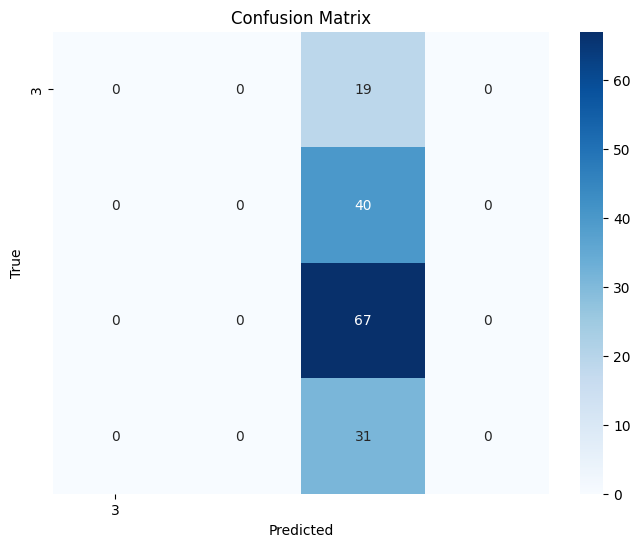

accuracy for class 1: 0.000
accuracy for class 2: 0.000
accuracy for class 3: 1.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.4021276595744681
precision on train set:  0.1617066545948393
recall on train set:  0.4021276595744681
f1 score on train set:  0.23065896103057504
balanced accuracy on train set:  0.25
logistic loss on train set:  0.005899580930750794
mse on train set:  0.9106382978723404

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
               Feature    Weight
10318  featsbcol1-bin1 -0.302128
10319  featsbcol2-bin1 -0.704255


In [31]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_infbins_1ook_beyondl1_model, aesthetic_mariajoaocardoso_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 12.703982830047607 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             3           3
1             2           2
2             4           3
3             3           3
4             2           3
..          ...         ...
152           4           3
153           3           3
154           4           3
155           3           3
156           3           3

[157 rows x 2 columns]
accuracy:  0.5222929936305732
precision:  0.365249035983708
recall:  0.5222929936305732
f1 score:  0.4046194428360033
balanced accuracy:  0.34375
logistic loss:  0.0007114729267250941
mse:  0.6305732484076433
number of far off predictions:  0
number of features:  10320
number of non-zero weights:  10320
model size (non-zero weights / all weights):  1.0


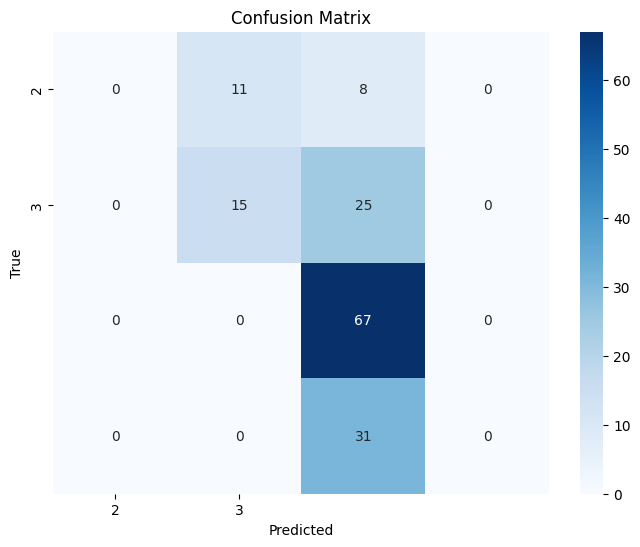

accuracy for class 1: 0.000
accuracy for class 2: 0.375
accuracy for class 3: 1.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.018559391050957417
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value  [0.13273382145639526, 0.23406307365458873[  0.045551
1          BRA Value   [0.23406307365458873, 0.3107575880267366[  0.045551
2          BRA Value   [0.3107575880267366, 0.32186438324311417[  0.060703
3          BRA Value  [0.32186438324311417, 0.33380354583410704[  0.045551
4          BRA Value   [0.33380354583410704, 0.3640572276620645[  0.030400
...              ...                                         ...       ...
10313  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.045551
10314  

In [17]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_infbins_1ook_adaptivelasso_model, aesthetic_mariajoaocardoso_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 1e-08},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5042553191489362
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5063829787234042
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5361702127659574
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5255319148936171
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5638297872340425
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5574468085106383
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5765957446808512
testing para

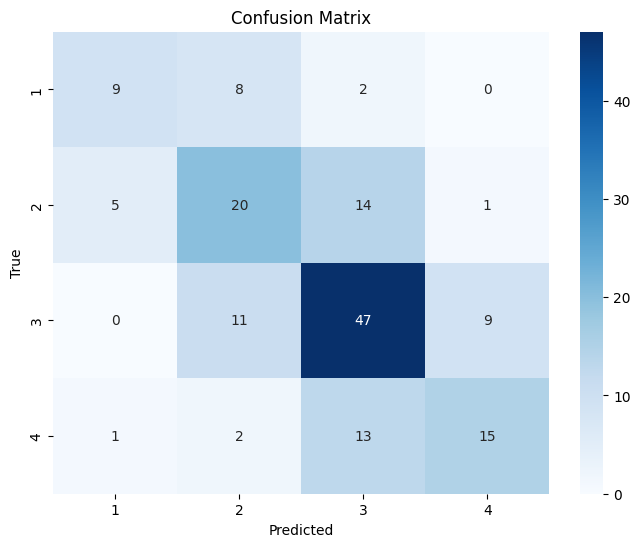

accuracy for class 1: 0.474
accuracy for class 2: 0.500
accuracy for class 3: 0.701
accuracy for class 4: 0.484

Evaluating the model on the train set...
accuracy on train set:  0.9851063829787234
precision on train set:  0.9855417348608838
recall on train set:  0.9851063829787234
f1 score on train set:  0.9850860781377031
balanced accuracy on train set:  0.9836071987480439
logistic loss on train set:  0.018561141170304364
mse on train set:  0.014893617021276596

Scorecard table:
           Feature                                         Bin    Points
0        BRA Value  [0.13273382145639526, 0.23406307365458873[  0.671452
1        BRA Value   [0.3107575880267366, 0.32186438324311417[  0.941968
2        BRA Value     [1.1224896463207412, 1.130782979733651[  1.043424
3        BRA Value    [1.3852778070127605, 1.3874249525805944[  0.149271
4        BRA Value    [1.4352786871255914, 1.4385202329787052[  0.102066
..             ...                                         ...       ...
372 

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_infbins_diff_ml_model, aesthetic_mariajoaocardoso_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ML',
                 params={'C': 1.1111111111111112, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3127659574468085
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.30425531914893617
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.325531914893617
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.32978723404255317
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3957446808510638
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3659574468085106
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  

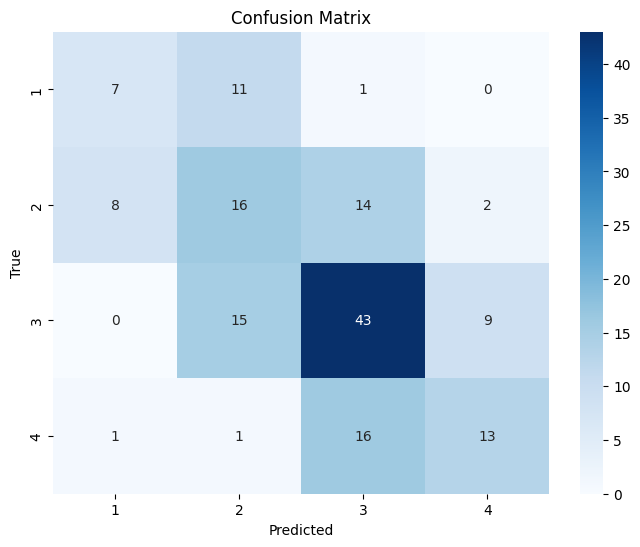

accuracy for class 1: 0.368
accuracy for class 2: 0.400
accuracy for class 3: 0.642
accuracy for class 4: 0.419

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.018559391050957417
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value  [0.13273382145639526, 0.23406307365458873[  0.025272
1          BRA Value   [0.23406307365458873, 0.3107575880267366[  0.019007
2          BRA Value   [0.3107575880267366, 0.32186438324311417[  0.039052
3          BRA Value  [0.32186438324311417, 0.33380354583410704[  0.012788
4          BRA Value   [0.33380354583410704, 0.3640572276620645[ -0.005321
...              ...                                         ...       ...
10313  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.006512
10314  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_infbins_diff_mm_model, aesthetic_mariajoaocardoso_infbins_diff_mm_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 params={'C': 0.125, 'class_weight': 'balanced'},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.5016100406646729 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             3           3
1             2           2
2             4           4
3             3           4
4             2           3
..          ...         ...
152           4           3
153           3           3
154           4           3
155           3           3
156           3           3

[157 rows x 2 columns]
accuracy:  0.535031847133758
precision:  0.5422876056481993
recall:  0.535031847133758
f1 score:  0.5030286600254525
balanced accuracy:  0.4369377644882548
logistic loss:  0.004630033621744949
mse:  0.5605095541401274
number of far off predictions:  0
number of features:  10320
number of non-zero weights:  12
model size (non-zero weights / all weights):  0.0011627906976744186


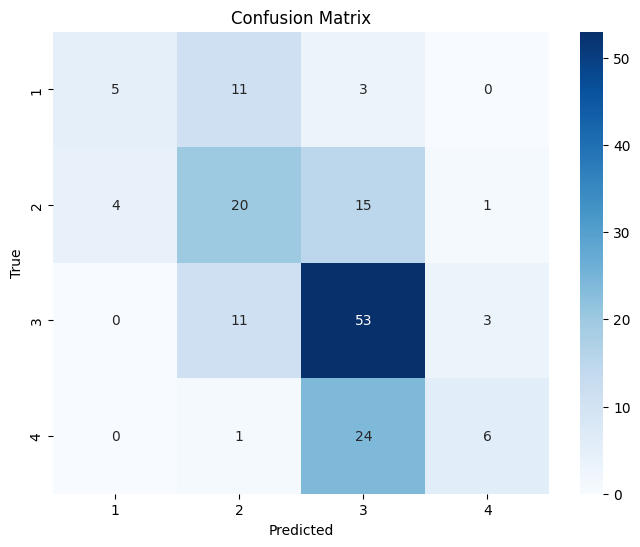

accuracy for class 1: 0.263
accuracy for class 2: 0.500
accuracy for class 3: 0.791
accuracy for class 4: 0.194

Evaluating the model on the train set...
accuracy on train set:  0.6234042553191489
precision on train set:  0.6472002945793323
recall on train set:  0.6234042553191489
f1 score on train set:  0.6013894540497752
balanced accuracy on train set:  0.558097526960706
logistic loss on train set:  0.016959994780916223
mse on train set:  0.3829787234042553

Scorecard table:
         Feature                                         Bin    Points
0     pLBC Value   [0.0204261352882818, 0.02057305727063225[ -0.122534
1     pLBC Value  [0.07093122385125511, 0.07130887590058571[ -0.171320
2     pUNR Value   [0.07211542556143795, 0.0729511914252078[ -0.070645
3     pUNR Value  [0.19661731676149696, 0.19923037174212574[ -0.202009
4     pBCE Value    [0.2903047052148102, 0.2915013948614924[ -0.129978
5     pBCD Value   [0.0511733545361501, 0.05182049836128505[ -0.092177
6     pBOD Value   [0

In [35]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_infbins_diff_beyondl1_model, aesthetic_mariajoaocardoso_infbins_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 32.14464998245239 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             3           3
1             2           3
2             4           3
3             3           4
4             2           3
..          ...         ...
152           4           4
153           3           3
154           4           3
155           3           3
156           3           4

[157 rows x 2 columns]
accuracy:  0.47770700636942676
precision:  0.48121911184856114
recall:  0.47770700636942676
f1 score:  0.46746509738219794
balanced accuracy:  0.422615012796797
logistic loss:  0.004630033621744949
mse:  0.6687898089171974
number of far off predictions:  0
number of features:  10320
number of non-zero weights:  10320
model size (non-zero weights / all weights):  1.0


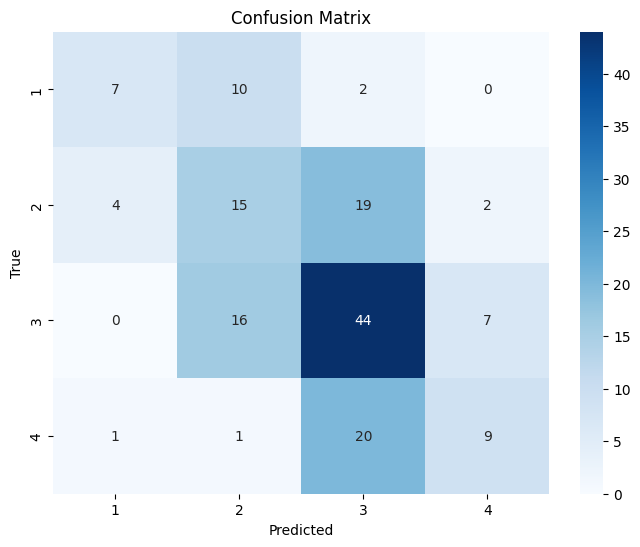

accuracy for class 1: 0.368
accuracy for class 2: 0.375
accuracy for class 3: 0.657
accuracy for class 4: 0.290

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.018559391050957417
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value  [0.13273382145639526, 0.23406307365458873[  0.013301
1          BRA Value   [0.23406307365458873, 0.3107575880267366[  0.010381
2          BRA Value   [0.3107575880267366, 0.32186438324311417[  0.012282
3          BRA Value  [0.32186438324311417, 0.33380354583410704[  0.007707
4          BRA Value   [0.33380354583410704, 0.3640572276620645[  0.003792
...              ...                                         ...       ...
10313  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.002367
10314  

In [18]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_mariajoaocardoso_infbins_diff_adaptivelasso_model, aesthetic_mariajoaocardoso_infbins_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_data_mariajoaocardoso_X, aesthetic_evaluation_data_mariajoaocardoso_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 params= {'alpha': 1e-08},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## wine quality dataset
model wine quality, score between 0 and 10, based on physicochemical tests

https://archive.ics.uci.edu/dataset/186/wine+quality

#### load dataset

Number of observations: 6497
Number of features: 11
Number of target classes: 7
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


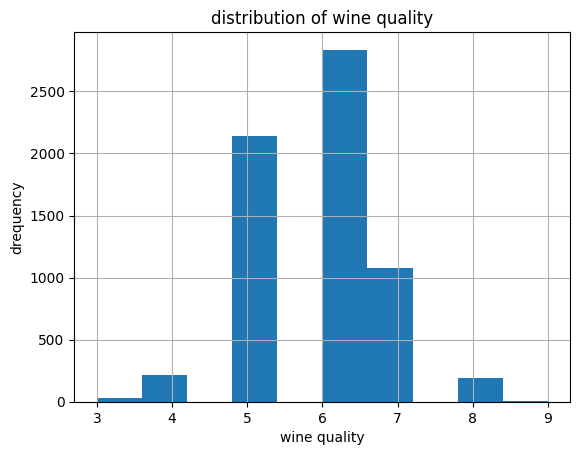

In [2]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
#print(wine_quality_data.metadata) 
  
# variable information 
#print(wine_quality_data.variables) 

wine_quality_y = pd.Series(wine_quality_y['quality'], name='quality')
wine_quality_y.value_counts()
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('drequency')
plt.title('distribution of wine quality')


# num of observations
num_observations = len(wine_quality_X)
print(f'Number of observations: {num_observations}')

# num of features
num_features = len(wine_quality_X.columns)
print(f'Number of features: {num_features}')

# number of target classes
num_classes = len(wine_quality_y.unique())
print(f'Number of target classes: {num_classes}')

# distribution of target variable
print(wine_quality_y.value_counts())

In [3]:
# change target class to 3 classes: bad, medium and good
wine_quality_y = wine_quality_y.map({3: 'Bad', 4: 'Bad', 5: 'Medium', 6: 'Medium', 7: 'Good', 8: 'Good', 9: 'Good'})
print(wine_quality_y.value_counts())
print("unique values in target variable:", wine_quality_y.unique())

quality
Medium    4974
Good      1277
Bad        246
Name: count, dtype: int64
unique values in target variable: ['Medium' 'Good' 'Bad']


In [4]:
categorical_columns = wine_quality_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    wine_quality_X[col] = wine_quality_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {wine_quality_X[col].unique()}")
    
mapping = {1: 'Bad', 2: 'Medium', 3: 'Good'}

K = 3  # number of classes

Categorical columns: []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.37291303831347805
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.39561648261142934
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.37291303831347805
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.39561648261142934
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3726652085481577
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.39502658239148525
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.3726998575909549
testing

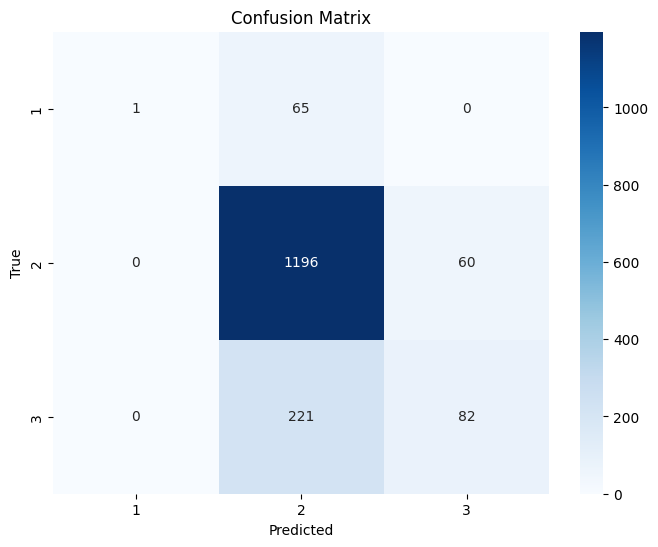

accuracy for class 1: 0.015
accuracy for class 2: 0.952
accuracy for class 3: 0.271

Evaluating the model on the train set...
accuracy on train set:  0.7799671592775042
precision on train set:  0.7643434057194585
recall on train set:  0.7799671592775042
f1 score on train set:  0.737431462244286
balanced accuracy on train set:  0.41038463399859704
logistic loss on train set:  0.01788863499693147
mse on train set:  0.22126436781609196

Scorecard table:
                 Feature                 Bin    Points
0          fixed_acidity          [3.8, 5.6[  0.837607
1          fixed_acidity          [5.6, 7.4[  0.626199
2          fixed_acidity         [7.4, 15.6[  0.568937
3          fixed_acidity         [15.6, inf[  1.161971
4       volatile_acidity       [0.08, 0.115[  2.230302
5       volatile_acidity       [0.115, 0.19[  0.881751
6       volatile_acidity        [0.19, 1.58[  0.270851
7       volatile_acidity         [1.58, inf[ -9.540104
8            citric_acid         [0.0, 0.26[ -0.58

In [5]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_ml_model, wine_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None, #{'C': 1.0101010101010102, 'class_weight': 'balanced'},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

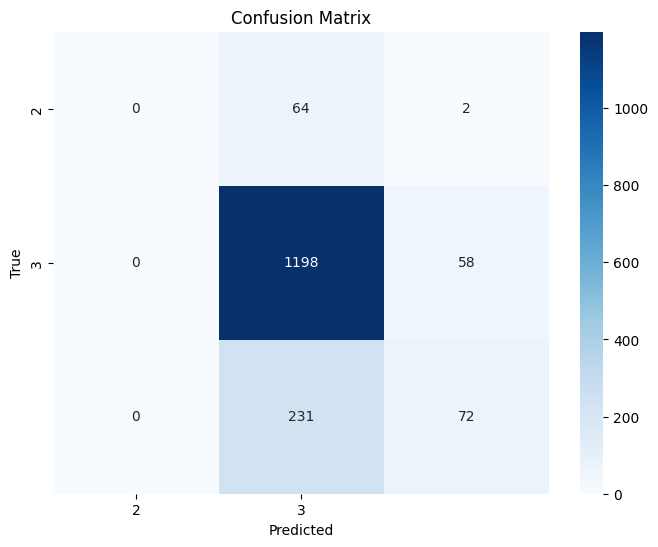

accuracy for class 1: 0.000
accuracy for class 2: 0.954
accuracy for class 3: 0.238

Evaluating the model on the train set...
accuracy on train set:  0.7746305418719212
precision on train set:  0.7181580862069731
recall on train set:  0.7746305418719212
f1 score on train set:  0.7264840444547344
balanced accuracy on train set:  0.39467871674474103
logistic loss on train set:  0.018192739212576633
mse on train set:  0.22844827586206898

Scorecard table:
                 Feature                 Bin    Points
0          fixed_acidity          [3.8, 5.6[  0.000029
1          fixed_acidity          [5.6, 7.4[ -0.000039
2          fixed_acidity         [7.4, 15.6[  0.000009
3       volatile_acidity       [0.08, 0.115[  0.093750
4       volatile_acidity       [0.115, 0.19[ -0.031221
5       volatile_acidity        [0.19, 1.58[ -0.031279
6       volatile_acidity         [1.58, inf[ -0.031250
7            citric_acid         [0.0, 0.26[  0.010439
8            citric_acid         [0.26, 0.4[  0.

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_mm_model, wine_caim_1ook_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params={'C': 0.03125, 'class_weight': None},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 7.946555852890015 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              3           2
1              2           2
2              3           2
3              2           2
4              2           2
...          ...         ...
1620           2           2
1621           3           2
1622           3           2
1623           1           2
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.7729230769230769
precision:  0.5974100828402368
recall:  0.7729230769230769
f1 score:  0.6739266814407392
balanced accuracy:  0.3333333333333333
logistic loss:  0.020088561028637097
mse:  0.22707692307692307
number of far off predictions:  0
number of features:  45
number of non-zero weights:  11
model size (non-zero weights / all weights):  0.24444444444444444


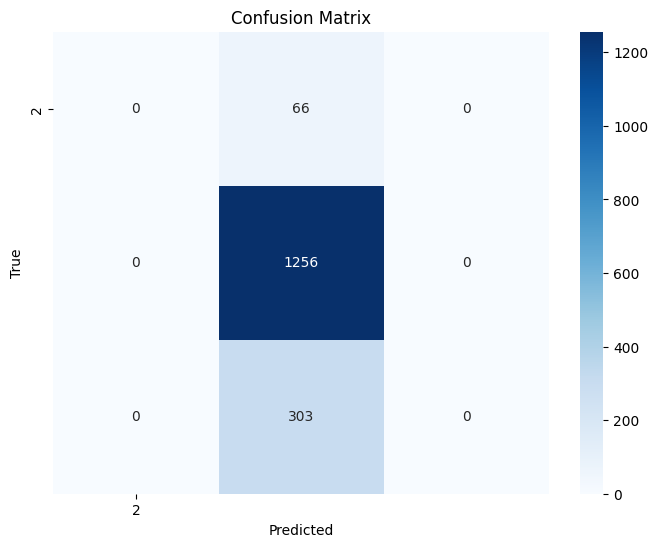

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202

Scorecard table:
               Feature           Bin    Points
0          citric_acid   [0.26, 0.4[  0.076863
1          citric_acid   [0.4, 1.23[  0.051774
2       residual_sugar    [0.6, 3.0[  0.200144
3       residual_sugar    [3.0, 7.1[  0.218420
4       residual_sugar   [7.1, 65.8[  0.209535
5  free_sulfur_dioxide  [27.0, 49.0[  0.049867
6                   pH   [2.74, 3.0[  0.462179
7                   pH   [3.0, 3.24[  0.450517
8                   pH  [3.24, 4.01[  0.471138
9              alcohol   [8.0, 10.8[ -0.140378

SBC columns weights:
       

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_1ook_beyondl1_model, wine_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 6.415191172696946e-05 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 1.00]
 ...
 [0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 1.00]] @ var14671 + -[1. 0. 1. ... 0. 1. 0.], 1.0) + norm1(param14673 @ var14671) is infeasible.
  fold  2
  fold  3
  fold  4
AdaptiveLasso infeasible: minimize 6.413545407901488e-05 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]

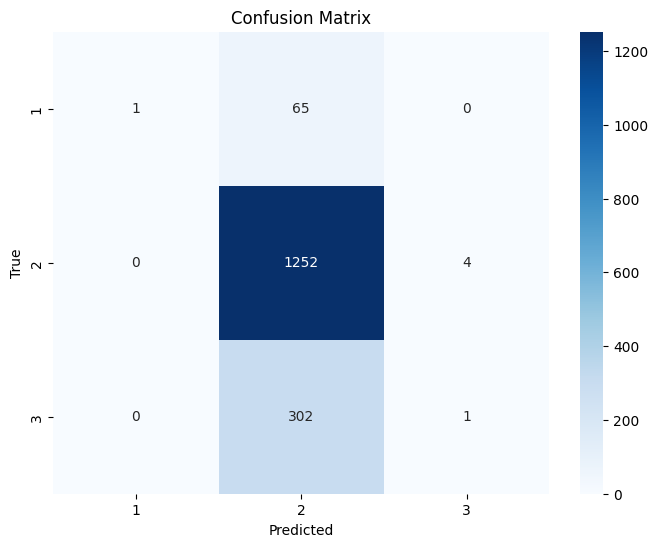

accuracy for class 1: 0.015
accuracy for class 2: 0.997
accuracy for class 3: 0.003

Evaluating the model on the train set...
accuracy on train set:  0.7645730706075534
precision on train set:  0.7758183898062169
recall on train set:  0.7645730706075534
f1 score on train set:  0.6647653110701118
balanced accuracy on train set:  0.33925334860416206
logistic loss on train set:  0.01946043379710117
mse on train set:  0.23542692939244664

Scorecard table:
                 Feature                 Bin    Points
0          fixed_acidity          [3.8, 5.6[  0.060553
1          fixed_acidity          [5.6, 7.4[  0.048468
2          fixed_acidity         [7.4, 15.6[  0.044429
3          fixed_acidity         [15.6, inf[  0.128501
4       volatile_acidity       [0.08, 0.115[  0.330601
5       volatile_acidity       [0.115, 0.19[  0.187976
6       volatile_acidity        [0.19, 1.58[  0.135856
7       volatile_acidity         [1.58, inf[ -0.370245
8            citric_acid         [0.0, 0.26[  0.0

In [ ]:
start_time = time.time()

scorecard = Scorecard()   
wine_caim_1ook_adaptivelasso_model, wine_caim_1ook_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params={'alpha': 1e-08},
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7740095824777549
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7748309377138947
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.77380424366872
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7746255989048597
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7740095824777549
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7742151318906967
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7742147106828832
testing parame

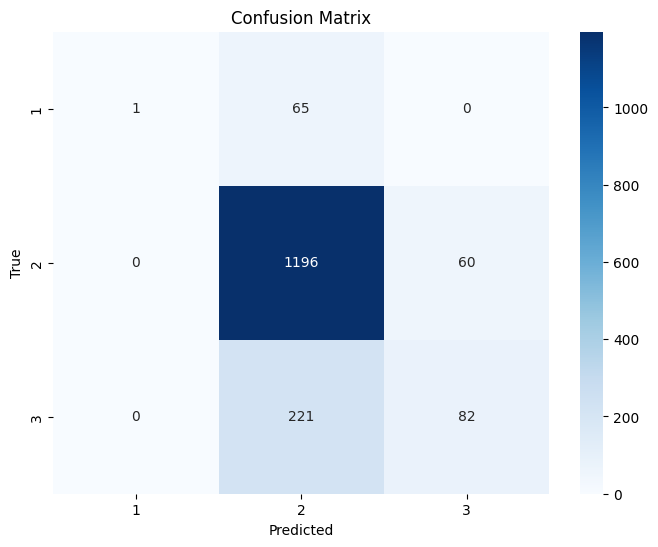

accuracy for class 1: 0.015
accuracy for class 2: 0.952
accuracy for class 3: 0.271

Evaluating the model on the train set...
accuracy on train set:  0.7799671592775042
precision on train set:  0.7643434057194585
recall on train set:  0.7799671592775042
f1 score on train set:  0.737431462244286
balanced accuracy on train set:  0.41038463399859704
logistic loss on train set:  0.01788863499693147
mse on train set:  0.22126436781609196

Scorecard table:
                 Feature                 Bin    Points
0          fixed_acidity          [3.8, 5.6[  0.988836
1          fixed_acidity          [5.6, 7.4[ -0.210283
2          fixed_acidity         [7.4, 15.6[ -0.057703
3          fixed_acidity         [15.6, inf[  0.595719
4       volatile_acidity       [0.08, 0.115[  0.290067
5       volatile_acidity       [0.115, 0.19[ -1.284804
6       volatile_acidity        [0.19, 1.58[ -0.612830
7       volatile_acidity         [1.58, inf[ -9.813006
8            citric_acid         [0.0, 0.26[  0.19

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_ml_model, wine_caim_diffcod_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1000.0, 'class_weight': None},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

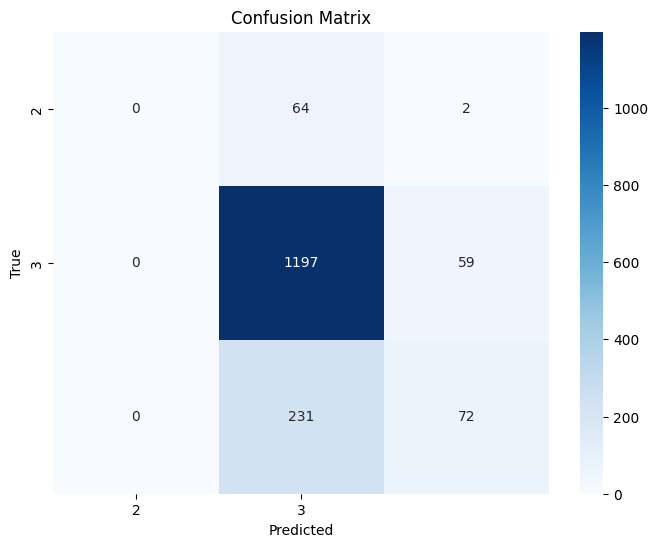

accuracy for class 1: 0.000
accuracy for class 2: 0.953
accuracy for class 3: 0.238

Evaluating the model on the train set...
accuracy on train set:  0.7748357963875205
precision on train set:  0.7185131474502372
recall on train set:  0.7748357963875205
f1 score on train set:  0.726809066988052
balanced accuracy on train set:  0.3950209480931326
logistic loss on train set:  0.018188430734627187
mse on train set:  0.22824302134646962

Scorecard table:
                 Feature                 Bin        Points
0          fixed_acidity          [3.8, 5.6[  2.742251e-14
1          fixed_acidity          [5.6, 7.4[  1.616017e-04
2          fixed_acidity         [7.4, 15.6[  2.508656e-05
3       volatile_acidity       [0.08, 0.115[  2.742251e-14
4       volatile_acidity       [0.115, 0.19[ -1.875000e-01
5       volatile_acidity        [0.19, 1.58[  1.010174e-05
6       volatile_acidity         [1.58, inf[ -6.250000e-02
7            citric_acid         [0.0, 0.26[  2.742251e-14
8            c

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_mm_model, wine_caim_diffcod_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0625, 'class_weight': None},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 7.612917900085449 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              3           2
1              2           2
2              3           2
3              2           2
4              2           2
...          ...         ...
1620           2           2
1621           3           2
1622           3           2
1623           1           2
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.7729230769230769
precision:  0.5974100828402368
recall:  0.7729230769230769
f1 score:  0.6739266814407392
balanced accuracy:  0.3333333333333333
logistic loss:  0.020088561028637097
mse:  0.22707692307692307
number of far off predictions:  0
number of features:  45
number of non-zero weights:  7
model size (non-zero weights / all weights):  0.15555555555555556


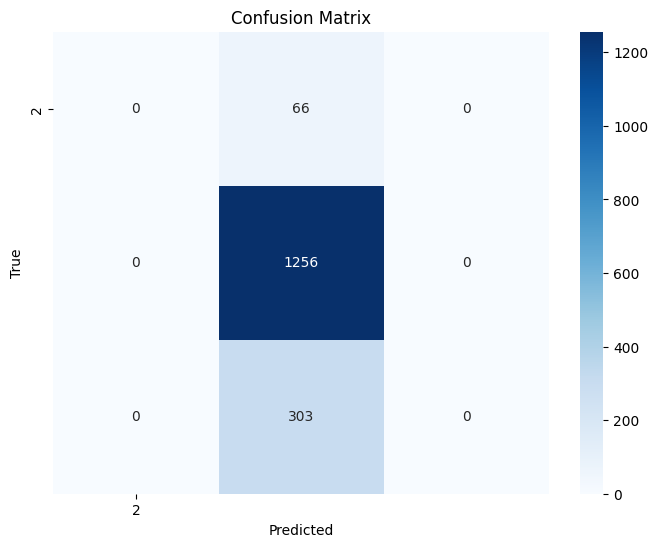

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202

Scorecard table:
               Feature                 Bin    Points
0          citric_acid         [0.26, 0.4[  0.054952
1            chlorides      [0.039, 0.611[ -0.034064
2  free_sulfur_dioxide         [1.0, 27.0[  0.928435
3  free_sulfur_dioxide        [27.0, 49.0[  0.047460
4              density  [0.99202, 1.03898[ -0.043164
5              alcohol        [10.8, 12.5[  0.116152

SBC columns weights:
            Feature    Weight
44  featsbcol1-bin1 -0.763489


In [46]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_beyondl1_model, wine_caim_diffcod_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7629259200758174
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
AdaptiveLasso infeasible: minimize 6.413545407901488e-05 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 1.00]
 ...
 [1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 1.00]] @ var17101 + -[1. 0. 1. ... 0. 1. 0.], 1.0) + norm1(param17103 @ var17101) is infeasible.
  fold  5
  mean score: 0.6134388458905913
testing parameters: {'alpha': 0.003593813663804626}
  fo

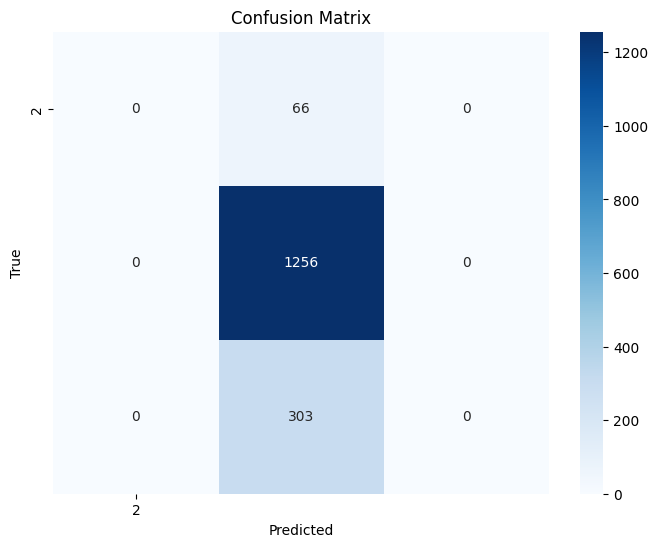

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202

Scorecard table:
                 Feature                 Bin        Points
0          fixed_acidity          [3.8, 5.6[  8.219514e-02
1          fixed_acidity          [5.6, 7.4[ -2.393077e-19
2          fixed_acidity         [7.4, 15.6[  3.888534e-20
3          fixed_acidity         [15.6, inf[  8.293043e-22
4       volatile_acidity       [0.08, 0.115[  8.221342e-02
5       volatile_acidity       [0.115, 0.19[ -2.735761e-20
6       volatile_acidity        [0.19, 1.58[ -9.307733e-20
7       volatile_acidity         [1.58, inf[ -3.503849e-22
8            ci

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_caim_diffcod_adaptivelasso_model, wine_caim_diffcod_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.04641588833612782},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6769274996051177
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6709775180329596
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6826761438424682
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6839073342810509
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7292674143105354
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7268031379982098
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7736010108987521
testing para

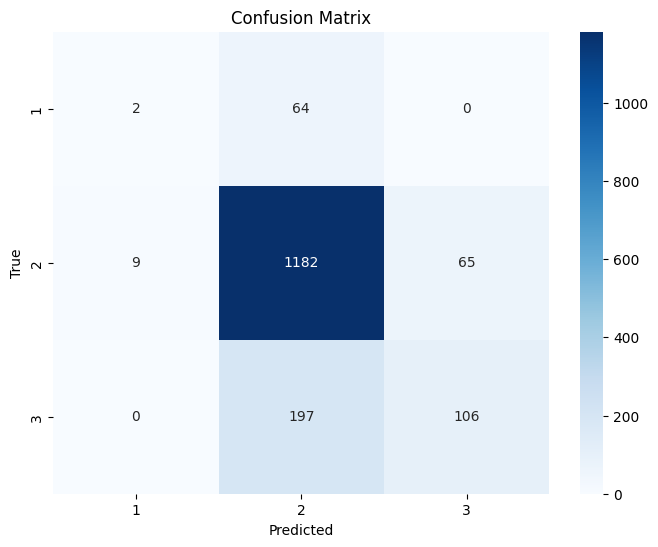

accuracy for class 1: 0.030
accuracy for class 2: 0.941
accuracy for class 3: 0.350

Evaluating the model on the train set...
accuracy on train set:  0.8460591133004927
precision on train set:  0.8521695814639205
recall on train set:  0.8460591133004927
f1 score on train set:  0.8190363818627014
balanced accuracy on train set:  0.5146686561944814
logistic loss on train set:  0.01845655343642461
mse on train set:  0.1539408866995074
Execution time: 66.90707612037659 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_ml_model, wine_infbins_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS', 
                    encoding_method='1_OUT_OF_K',
                    model_method='ML',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

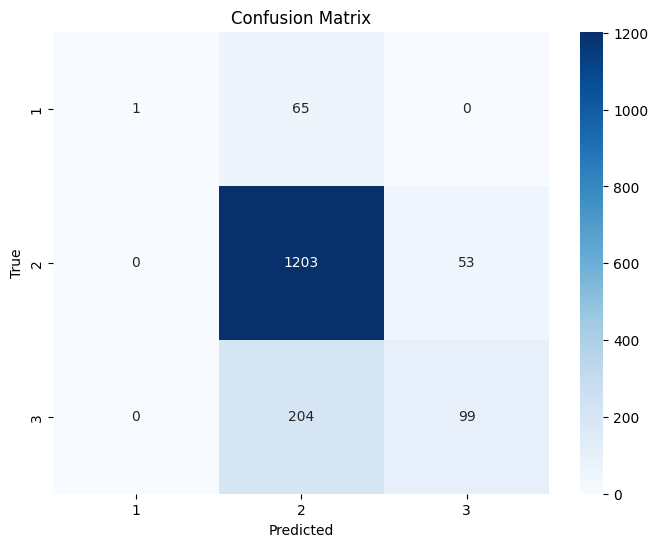

accuracy for class 1: 0.015
accuracy for class 2: 0.958
accuracy for class 3: 0.327

Evaluating the model on the train set...
accuracy on train set:  0.8456486042692939
precision on train set:  0.8594841387392044
recall on train set:  0.8456486042692939
f1 score on train set:  0.8162326232891317
balanced accuracy on train set:  0.5061659816516869
logistic loss on train set:  0.01836008039063468
mse on train set:  0.15435139573070608
Execution time: 3856.37624001503 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_mm_model, wine_infbins_1ook_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='MM',
                    params={'C': 0.25, 'class_weight': 'balanced'}
                    use_sbc=True,
                    K=K,
                    mapping=mapping)
scorecard.evaluate()   

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


Evaluating the model on the test set...
      True Value  Prediction
0              3           2
1              2           2
2              3           2
3              2           2
4              2           2
...          ...         ...
1620           2           2
1621           3           2
1622           3           2
1623           1           2
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.7729230769230769
precision:  0.5974100828402368
recall:  0.7729230769230769
f1 score:  0.6739266814407392
balanced accuracy:  0.3333333333333333
logistic loss:  0.020088561028637097
mse:  0.22707692307692307
number of far off predictions:  0
number of features:  2475
number of non-zero weights:  1
model size (non-zero weights / all weights):  0.00040404040404040404


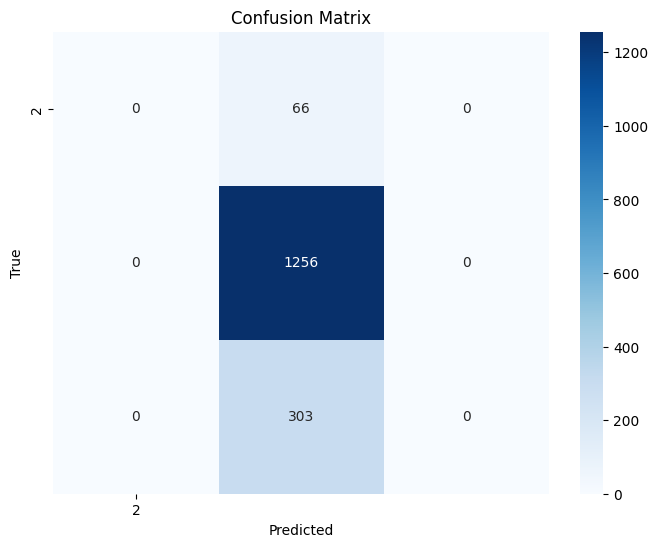

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202
Execution time: 0.9144971370697021 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_beyondl1_model, wine_infbins_1ook_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='BEYOND_L1',
                    params=None,
                    use_sbc=True,
                    K=K,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7124384773337545
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7122331385247196
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7122331385247196
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
AdaptiveLasso infeasible: minimize 6.415191172696946e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]] @ var19036 + -[1. 0. 1. ... 0. 1. 0.], 1.0) + norm1(param19038 @ var19036) is infeasible.
  fold  2
AdaptiveLasso infeasible: minimize 6.415191172696946e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 1.00]] @ var19081 + -[1. 0. 1. ... 0. 1. 0.], 1.0) + norm1(param19083 @ var

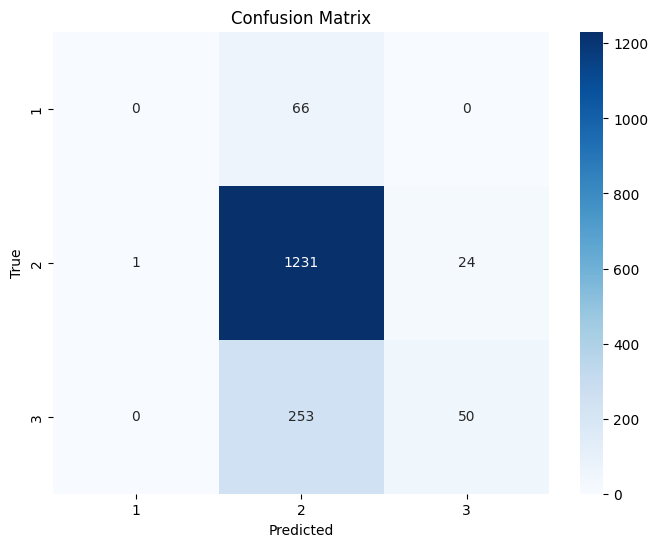

accuracy for class 1: 0.000
accuracy for class 2: 0.980
accuracy for class 3: 0.165

Evaluating the model on the train set...
accuracy on train set:  0.7980295566502463
precision on train set:  0.807718094448521
recall on train set:  0.7980295566502463
f1 score on train set:  0.7390662804305022
balanced accuracy on train set:  0.40487004556661804
logistic loss on train set:  0.01900725531758552
mse on train set:  0.2019704433497537
Execution time: 123.0759220123291 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_1ook_adaptivelasso_model, wine_infbins_1ook_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ADAPTIVE_LASSO',
                    params={'alpha': 0.0002782559402207126},
                    use_sbc=True,
                    K=K,
                    mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6752854209445585
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6818541567946086
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6908886431843311
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6974542199757805
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.741583530774496
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7419935765808456
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7750381719580898
testing param

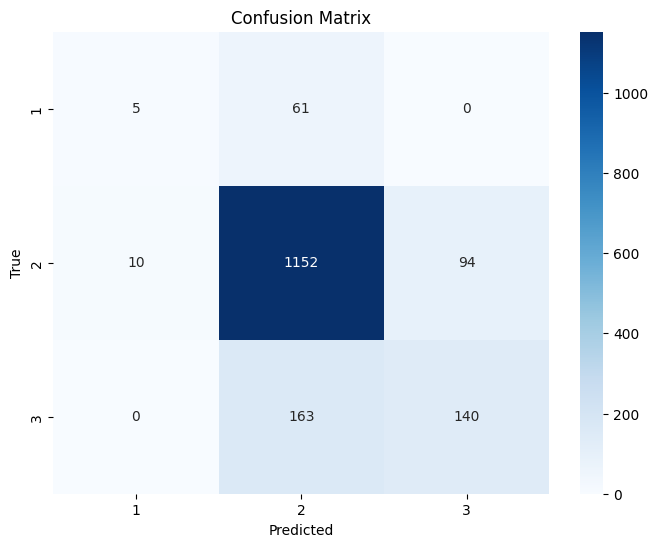

accuracy for class 1: 0.076
accuracy for class 2: 0.917
accuracy for class 3: 0.462

Evaluating the model on the train set...
accuracy on train set:  0.8563218390804598
precision on train set:  0.8509626334100516
recall on train set:  0.8563218390804598
f1 score on train set:  0.839422724753932
balanced accuracy on train set:  0.5595462070821414
logistic loss on train set:  0.017892669469301705
mse on train set:  0.14367816091954022

Scorecard table:
           Feature                          Bin    Points
0    fixed_acidity                 [4.75, 4.85[  0.382842
1    fixed_acidity                 [5.55, 5.65[  0.069152
2    fixed_acidity                 [5.65, 5.75[ -0.437235
3    fixed_acidity                 [5.85, 5.95[ -0.332040
4    fixed_acidity                 [5.95, 6.05[  0.314887
..             ...                          ...       ...
765        alcohol  [12.55, 12.649999999999999[  0.607900
766        alcohol       [12.775, 12.846666665[  1.109591
767        alcohol  [12

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_ml_model, wine_infbins_diffcod_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML',
                params={'C': 1.0101010101010102, 'class_weight': None},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7647748117727584
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7694954983414942
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7631316800926657
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7713433370189017
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

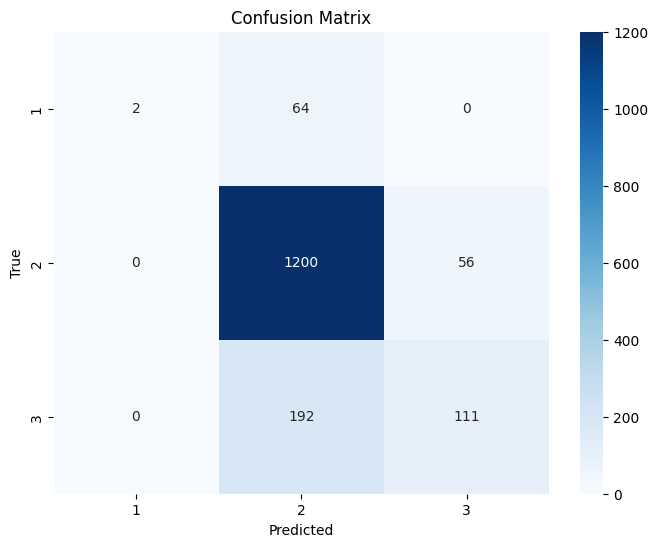

accuracy for class 1: 0.030
accuracy for class 2: 0.955
accuracy for class 3: 0.366

Evaluating the model on the train set...
accuracy on train set:  0.833743842364532
precision on train set:  0.831994336904911
recall on train set:  0.833743842364532
f1 score on train set:  0.8057445316645108
balanced accuracy on train set:  0.49342963880161794
logistic loss on train set:  0.01805110638465445
mse on train set:  0.16625615763546797

Scorecard table:
            Feature                          Bin        Points
0     fixed_acidity   [3.8499999999999996, 4.05[  4.163336e-16
1     fixed_acidity    [4.05, 4.300000000000001[ -1.145710e-02
2     fixed_acidity    [4.300000000000001, 4.45[ -1.145710e-02
3     fixed_acidity                 [4.45, 4.55[ -1.145710e-02
4     fixed_acidity                 [4.55, 4.65[ -1.145710e-02
...             ...                          ...           ...
2467        alcohol  [13.75, 13.850000000000001[ -3.866458e-02
2468        alcohol  [13.850000000000001, 1

In [ ]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_mm_model, wine_infbins_diffcod_mm_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0625, 'class_weight': None},
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 2.4276301860809326 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              3           2
1              2           2
2              3           2
3              2           2
4              2           2
...          ...         ...
1620           2           2
1621           3           2
1622           3           2
1623           1           2
1624           2           2

[1625 rows x 2 columns]
accuracy:  0.7729230769230769
precision:  0.5974100828402368
recall:  0.7729230769230769
f1 score:  0.6739266814407392
balanced accuracy:  0.3333333333333333
logistic loss:  0.020088561028637097
mse:  0.22707692307692307
number of far off predictions:  0
number of features:  2475
number of non-zero weights:  6
model size (non-zero weights / all weights):  0.0024242424242424242


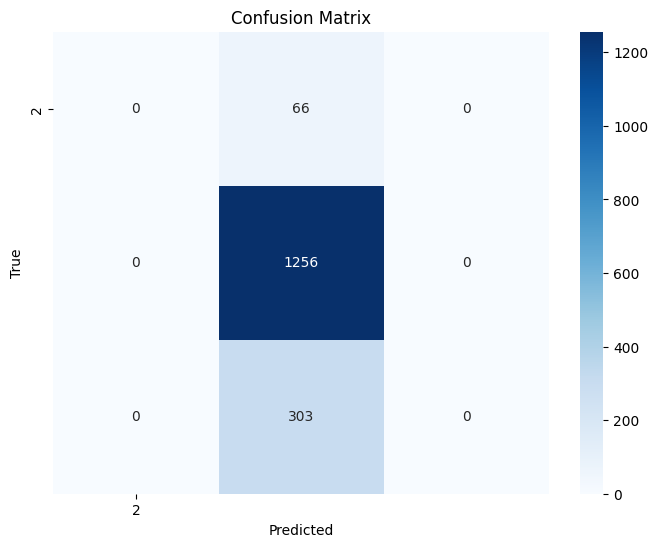

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.763136288998358
precision on train set:  0.5823769955861853
recall on train set:  0.763136288998358
f1 score on train set:  0.6606148364367626
balanced accuracy on train set:  0.3333333333333333
logistic loss on train set:  0.019486284664797838
mse on train set:  0.23686371100164202

Scorecard table:
               Feature                           Bin    Points
0     volatile_acidity              [0.2425, 0.2475[ -0.059788
1  free_sulfur_dioxide                  [22.5, 23.5[  0.061403
2            sulphates                [0.575, 0.585[  0.051020
3              alcohol  [10.583333334999999, 10.625[  0.089490
4              alcohol              [11.775, 11.825[  0.138892

SBC columns weights:
              Feature    Weight
2474  featsbcol1-bin1 -0.763259


In [24]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_beyondl1_model, wine_infbins_diffcod_beyondl1_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [5]:
start_time = time.time()

scorecard = Scorecard()
wine_infbins_diffcod_adaptivelasso_model, wine_infbins_diffcod_adaptivelasso_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1


TypeError: '<' not supported between instances of 'float' and 'str'

## car evaluation dataset
evaluate car acceptability

https://archive.ics.uci.edu/dataset/19/car+evaluation

#### load dataset

In [2]:
# fetch dataset 
car_evaluation_data = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
car_evaluation_X = car_evaluation_data.data.features 
car_evaluation_y = car_evaluation_data.data.targets 
  
# metadata 
print(car_evaluation_data.metadata) 
  
# variable information 
print(car_evaluation_data.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [3]:
car_evaluation_y = pd.Series(car_evaluation_y['class'], name='class')

In [4]:
car_evaluation_y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Class')

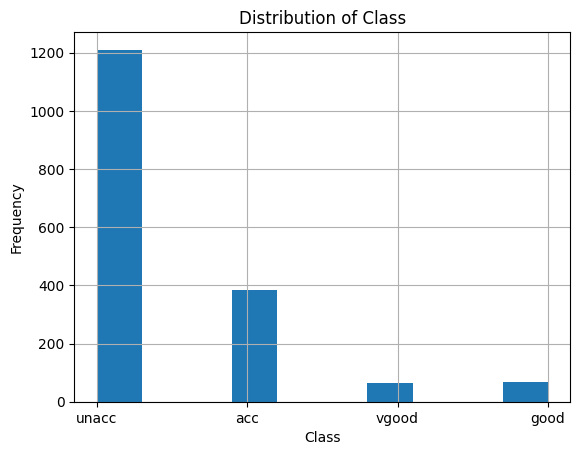

In [5]:
car_evaluation_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [6]:
# get type of each column
print("types: ", car_evaluation_X.dtypes)

# show categorical columns
print("\nobject columns: ", car_evaluation_X.select_dtypes(include=['object']).columns)
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", car_evaluation_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", car_evaluation_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

object columns:  Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

number of unique values in each categorical column:  buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
dtype: int64

values of all categorical columns:  buying      [vhigh, high, med, low]
maint       [vhigh, high, med, low]
doors              [2, 3, 4, 5more]
persons                [2, 4, more]
lug_boot          [small, med, big]
safety             [low, med, high]
dtype: object


In [7]:
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    car_evaluation_X.loc[:, col] = car_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {car_evaluation_X[col].unique()}")

categorical columns:  ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Column buying encoded as: [3 0 2 1]
Column maint encoded as: [3 0 2 1]
Column doors encoded as: [0 1 2 3]
Column persons encoded as: [0 1 2]
Column lug_boot encoded as: [2 1 0]
Column safety encoded as: [1 2 0]


In [8]:
mapping = {1: 'unacc', 2: 'acc', 3: 'good', 4: 'vgood'}
K=4

#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing 

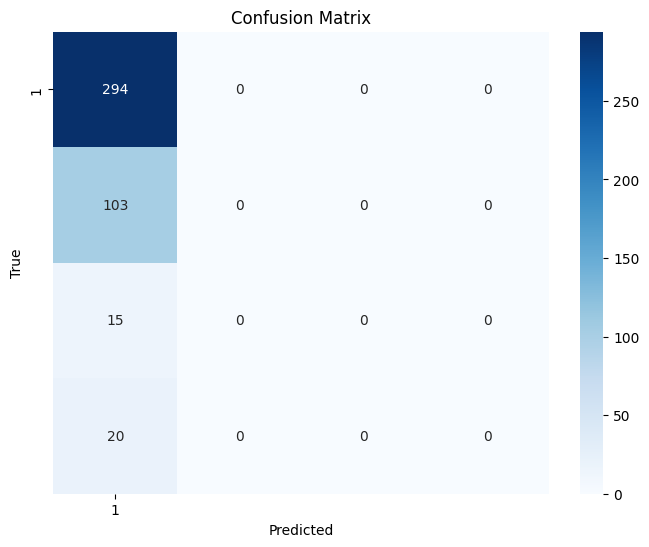

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
   Feature Bin    Points
0   buying   0 -1.418047
1    maint   0  0.203263
2    doors   0 -0.230898
3  persons   0  0.084380
4   safety   0  0.219568

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -1.611906
22  featsbcol2-bin1 -2.444284


In [9]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.1782001782001782
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
 

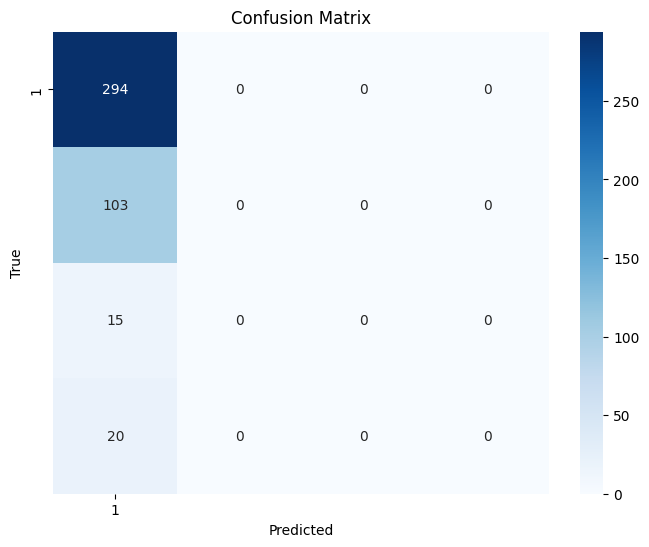

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -0.000977
22  featsbcol2-bin1 -0.000977


In [10]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_mm_model, car_caim_1ook_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 3.277499198913574 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             1           1
1             2           1
2             1           1
3             2           1
4             1           1
..          ...         ...
427           1           1
428           2           1
429           1           1
430           3           1
431           1           1

[432 rows x 2 columns]
accuracy:  0.6805555555555556
precision:  0.4631558641975309
recall:  0.6805555555555556
f1 score:  0.5511937557392103
balanced accuracy:  0.25
logistic loss:  0.2842004719211655
mse:  0.7939814814814815
number of far off predictions:  0
number of features:  23
number of non-zero weights:  4
model size (non-zero weights / all weights):  0.17391304347826086


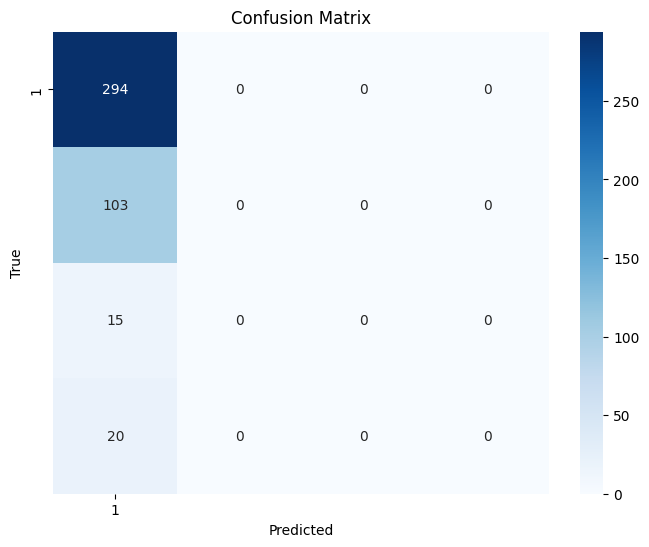

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
    Feature Bin    Points
0    buying   0  0.064590
1  lug_boot   0  0.220936

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -0.216821
22  featsbcol2-bin1 -0.258488


In [11]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_beyondl1_model, car_caim_1ook_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

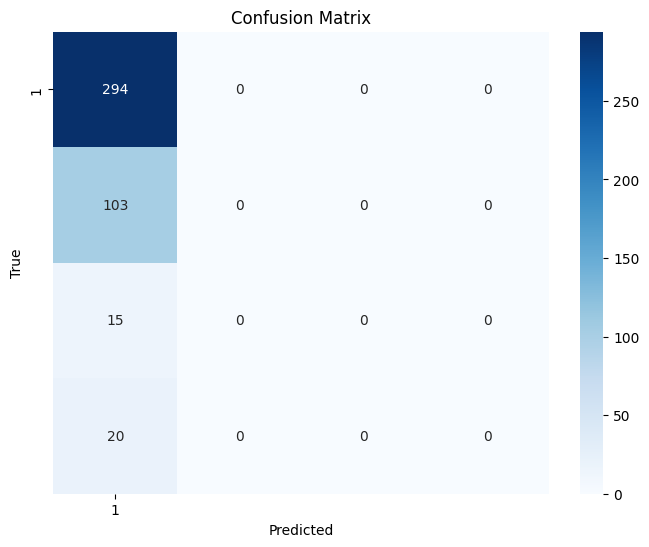

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
     Feature Bin        Points
0     buying   0  4.886831e-02
1     buying   1 -2.364677e-20
2     buying   2 -2.364677e-20
3     buying   3 -2.364677e-20
4      maint   0  4.886831e-02
5      maint   1 -2.364677e-20
6      maint   2 -2.364677e-20
7      maint   3 -2.364677e-20
8      doors   0  4.886831e-02
9      doors   1 -2.364677e-20
10     doors   2 -2.364677e-20
11     doors   3 -2.364677e-20
12   persons   0  4.886831e-02
13   persons   1 -2.364677e-20
14   persons   2 -2.364677e-20
15  lug_boot   0  4.886831e-02
16  lu

In [12]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_adaptivelasso_model, car_caim_1ook_adaptivelasso_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing 

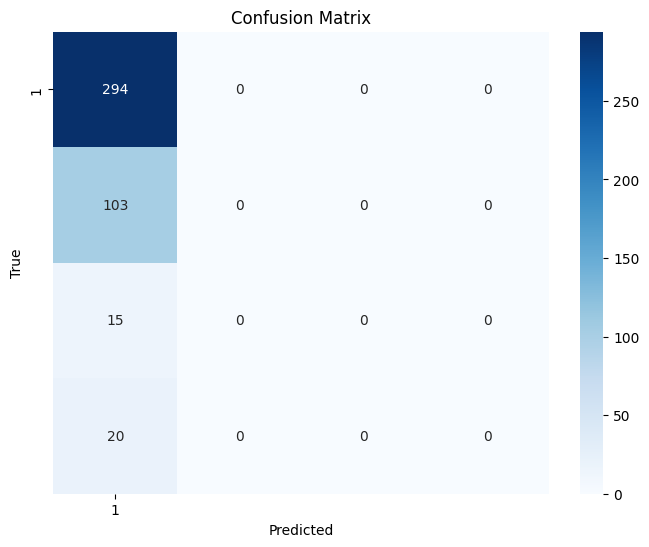

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:


IndexError: single positional indexer is out-of-bounds

In [13]:
start_time = time.time()

scorecard = Scorecard()
car_caim_diffcod_ml_model, car_caim_diffcod_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.1782001782001782
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
 

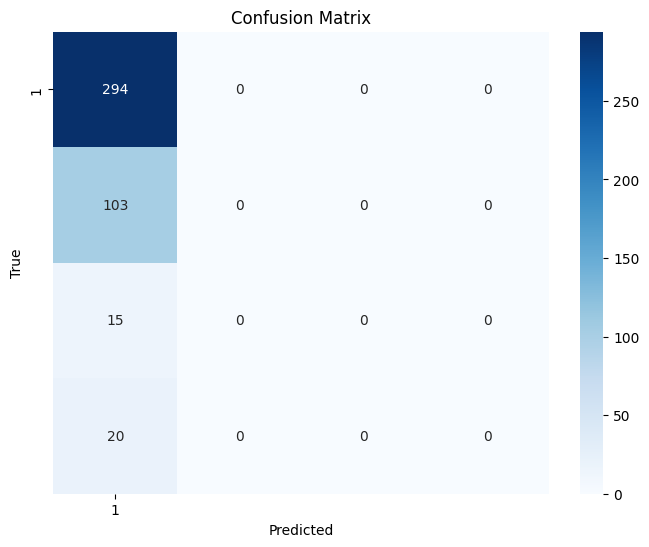

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:


IndexError: single positional indexer is out-of-bounds

In [14]:
start_time = time.time()

scorecard = Scorecard()
car_caim_diffcod_mm_model, car_caim_diffcod_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.08572793006896973 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             1           1
1             2           1
2             1           1
3             2           1
4             1           1
..          ...         ...
427           1           1
428           2           1
429           1           1
430           3           1
431           1           1

[432 rows x 2 columns]
accuracy:  0.6805555555555556
precision:  0.4631558641975309
recall:  0.6805555555555556
f1 score:  0.5511937557392103
balanced accuracy:  0.25
logistic loss:  0.2842004719211655
mse:  0.7939814814814815
number of far off predictions:  0
number of features:  17
number of non-zero weights:  2
model size (non-zero weights / all weights):  0.11764705882352941


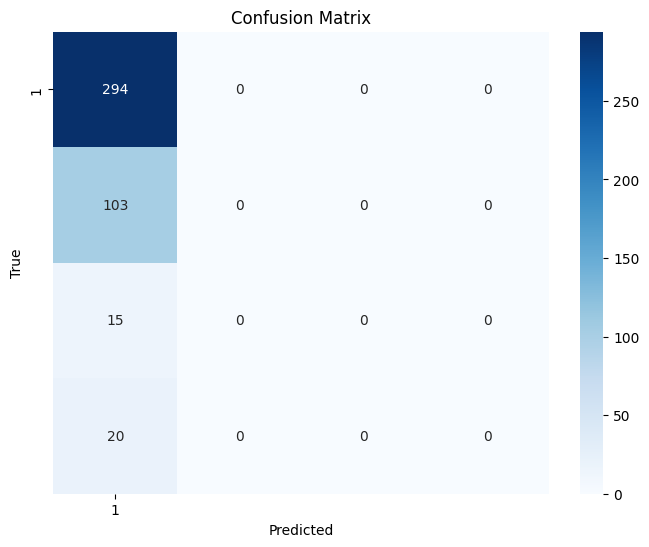

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:


IndexError: single positional indexer is out-of-bounds

In [15]:
start_time = time.time()

scorecard = Scorecard()
car_caim_diffcod_beyondl1_model, car_caim_diffcod_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

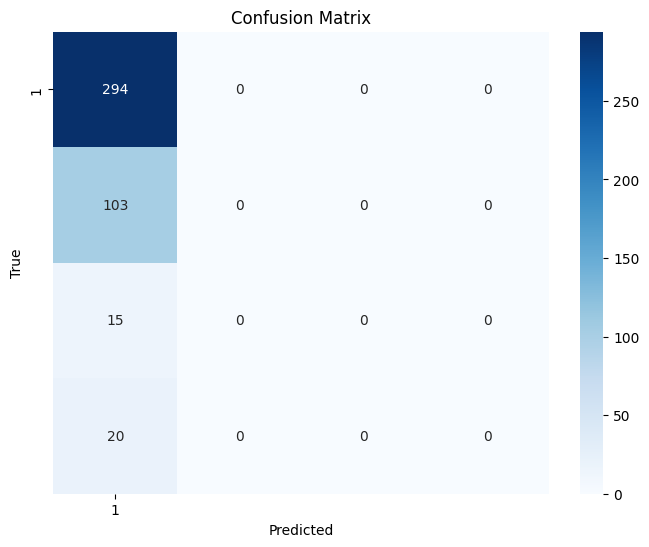

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:


IndexError: single positional indexer is out-of-bounds

In [16]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.21681021681021678
testing 

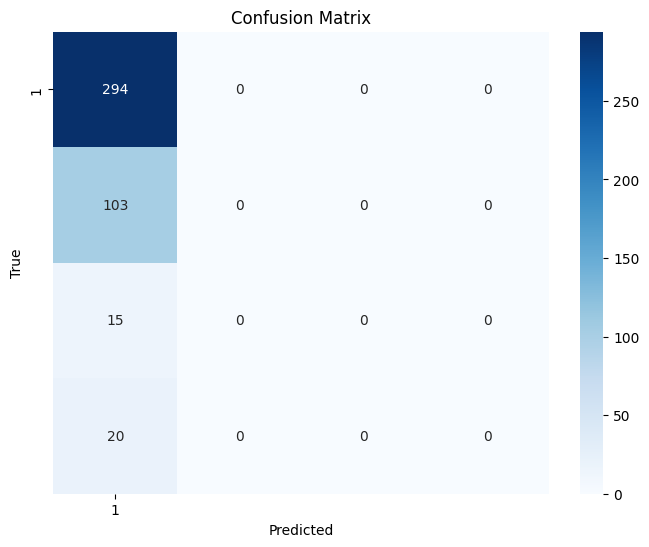

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876
Execution time: 14.725142002105713 seconds


In [17]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.16934362934362937
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.1782001782001782
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
 

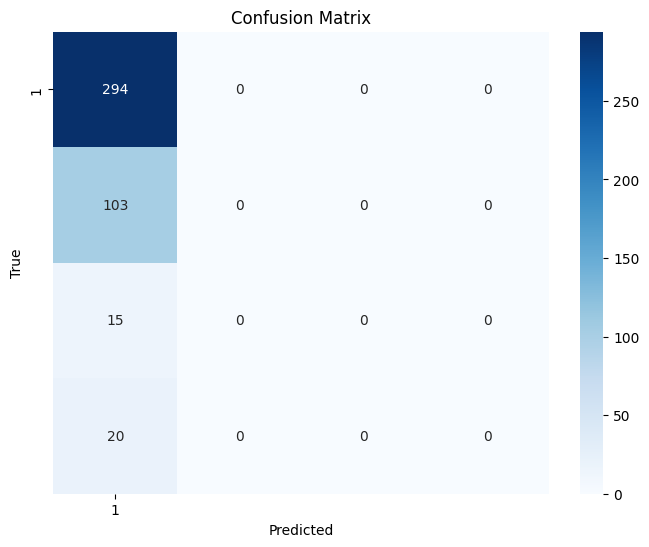

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -0.000977
22  featsbcol2-bin1 -0.000977


In [18]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_mm_model, car_infbins_1ook_mm_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.0888667106628418 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             1           1
1             2           1
2             1           1
3             2           1
4             1           1
..          ...         ...
427           1           1
428           2           1
429           1           1
430           3           1
431           1           1

[432 rows x 2 columns]
accuracy:  0.6805555555555556
precision:  0.4631558641975309
recall:  0.6805555555555556
f1 score:  0.5511937557392103
balanced accuracy:  0.25
logistic loss:  0.2842004719211655
mse:  0.7939814814814815
number of far off predictions:  0
number of features:  23
number of non-zero weights:  4
model size (non-zero weights / all weights):  0.17391304347826086


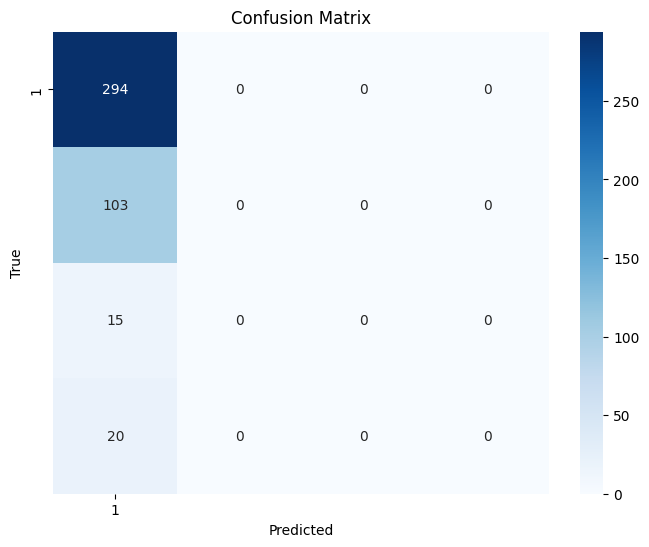

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
    Feature Bin    Points
0    buying   0  0.064590
1  lug_boot   0  0.220936

SBC columns weights:
            Feature    Weight
21  featsbcol1-bin1 -0.216821
22  featsbcol2-bin1 -0.258488


In [19]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_beyondl1_model, car_infbins_1ook_beyondl1_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7067953667953668
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

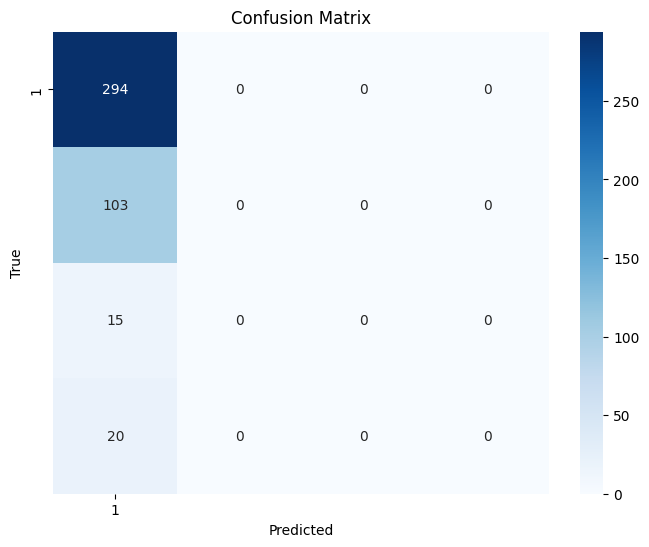

accuracy for class 1: 1.000
accuracy for class 2: 0.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7067901234567902
precision on train set:  0.4995522786160646
recall on train set:  0.7067901234567902
f1 score on train set:  0.5853704819949547
balanced accuracy on train set:  0.25
logistic loss on train set:  0.2613325812562405
mse on train set:  0.6959876543209876

Scorecard table:
     Feature Bin        Points
0     buying   0  4.886831e-02
1     buying   1 -2.364677e-20
2     buying   2 -2.364677e-20
3     buying   3 -2.364677e-20
4      maint   0  4.886831e-02
5      maint   1 -2.364677e-20
6      maint   2 -2.364677e-20
7      maint   3 -2.364677e-20
8      doors   0  4.886831e-02
9      doors   1 -2.364677e-20
10     doors   2 -2.364677e-20
11     doors   3 -2.364677e-20
12   persons   0  4.886831e-02
13   persons   1 -2.364677e-20
14   persons   2 -2.364677e-20
15  lug_boot   0  4.886831e-02
16  lu

In [20]:
start_time = time.time()

scorecard = Scorecard()
car_infbins_1ook_adaptivelasso_model, car_infbins_1ook_adaptivelasso_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None,
                use_sbc=True,
                K=K,
                mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params=None,
                 use_sbc=True,
                 K=K,
                 mapping=mapping)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## abalone

#### load dataset

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Rings')

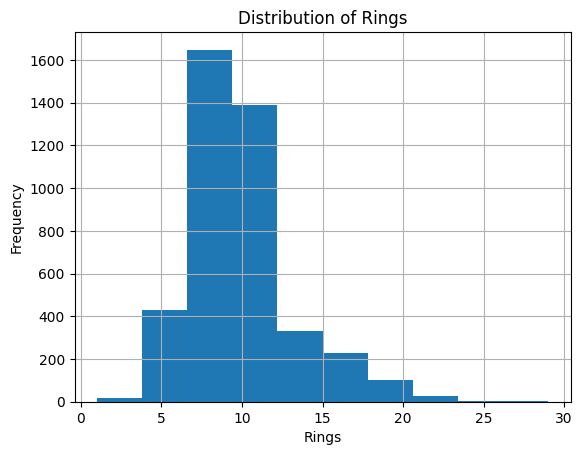

In [2]:
# fetch dataset 
abalone_data = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
abalone_X = abalone_data.data.features 
abalone_y = abalone_data.data.targets 
  
# metadata 
# print(abalone_data.metadata) 
  
# variable information 
# print(abalone_data.variables) 

abalone_y  = pd.Series(abalone_y ['Rings'], name='Rings')
print(abalone_y .value_counts())
abalone_y.hist()
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')

In [3]:
print("number of observations: ", len(abalone_X))

print("number of features: ", len(abalone_X.columns))

number of observations:  4177
number of features:  8


In [4]:
abalone_y = abalone_y.map(lambda x: 1 if x <= 5 else
                          (2 if x <= 10 else
                           (3 if x <= 15 else
                            (4 if x <= 20 else 5))))

print(abalone_y.value_counts())

K=5

Rings
2    2541
3    1186
4     225
1     189
5      36
Name: count, dtype: int64


In [5]:
categorical_columns = abalone_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    abalone_X.loc[:, col] = abalone_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {abalone_X[col].unique()}")

categorical columns:  ['Sex']
Column Sex encoded as: [2 0 1]


#### CAIM & 1ook

Execution time: 3.9594287872314453 seconds

Evaluating the model on the test set...
test predictions:  [1 1 0 ... 0 0 0]
      True Value  Prediction
0              2           3
1              2           2
2              4           3
3              2           3
4              3           3
...          ...         ...
1040           3           2
1041           2           2
1042           2           3
1043           2           3
1044           2           2

[1045 rows x 2 columns]
accuracy:  0.6775119617224881
precision:  0.6361450133414186
recall:  0.6775119617224881
f1 score:  0.6548232729479305
balanced accuracy:  0.3855300683047131
logistic loss:  0.023961898281870696
mse:  0.3990430622009569
number of far off predictions:  25
number of features:  48
number of non-zero weights:  46
model size (non-zero weights / all weights):  0.9583333333333334


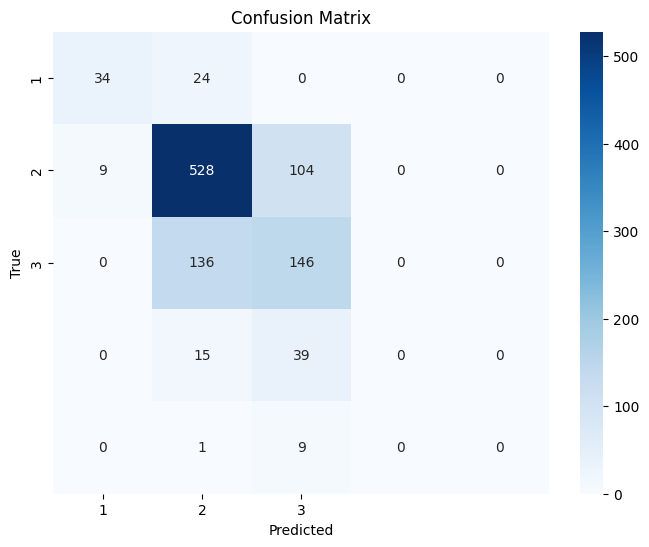

accuracy for class 1: 0.586
accuracy for class 2: 0.824
accuracy for class 3: 0.518
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6845466155810983
precision on train set:  0.6725931451846819
recall on train set:  0.6845466155810983
f1 score on train set:  0.658411167284777
balanced accuracy on train set:  0.39133931283883105
logistic loss on train set:  0.0205627507070307
mse on train set:  0.3949553001277139

Scorecard table:
         Feature    Weight
0  featSex-bin-1  0.194481
1   featSex-bin1  0.000000
2   featSex-bin2  0.000000
           Feature    Weight
3  featLength-bin1  1.252664
4  featLength-bin2 -0.596466
5  featLength-bin3  1.157538
6  featLength-bin4  0.583322
7  featLength-bin5  0.362770
8  featLength-bin6  1.086425
              Feature    Weight
9   featDiameter-bin1 -0.787385
10  featDiameter-bin2  0.196777
11  featDiameter-bin3  0.711343
12  featDiameter-bin4  0.982643
13  featDiameter-bin

In [6]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_ml_model, abalone_caim_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params={'C': 1000.0, 'class_weight': None},
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.2886237522356574
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  mean score: 0.2886237522356574
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.30841881060478676
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  mean score: 0.30841881060478676
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  

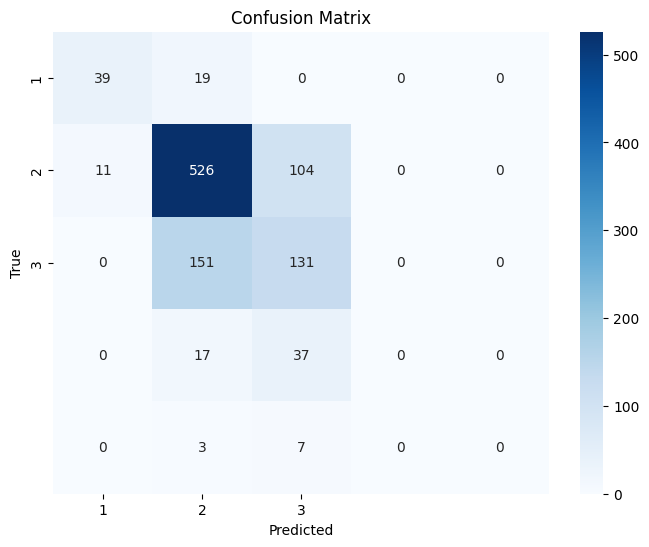

accuracy for class 1: 0.672
accuracy for class 2: 0.821
accuracy for class 3: 0.465
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.677522349936143
precision on train set:  0.6276325787224829
recall on train set:  0.677522349936143
f1 score on train set:  0.6501101946942855
balanced accuracy on train set:  0.39023142535119126
logistic loss on train set:  0.021190637196851773
mse on train set:  0.41794380587484037

Scorecard table:
         Feature        Weight
0  featSex-bin-1 -3.511774e-14
1   featSex-bin1  0.000000e+00
2   featSex-bin2  0.000000e+00
           Feature    Weight
3  featLength-bin1 -0.200815
4  featLength-bin2 -0.021492
5  featLength-bin3  0.053661
6  featLength-bin4  0.053716
7  featLength-bin5  0.053589
8  featLength-bin6  0.061341
              Feature    Weight
9   featDiameter-bin1 -0.263315
10  featDiameter-bin2 -0.006342
11  featDiameter-bin3  0.069398
12  featDiameter-bin4  0.069447
13

In [8]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_mm_model, abalone_caim_1ook_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                    K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 8.332942008972168 seconds

Evaluating the model on the test set...
test predictions:  [1.07528336 0.46864223 0.17991829 ... 0.362869   0.07414505 0.01961728]
      True Value  Prediction
0              2           2
1              2           2
2              4           2
3              2           2
4              3           2
...          ...         ...
1040           3           2
1041           2           2
1042           2           2
1043           2           2
1044           2           2

[1045 rows x 2 columns]
accuracy:  0.6133971291866028
precision:  0.376256038094366
recall:  0.6133971291866028
f1 score:  0.46641466169467666
balanced accuracy:  0.2
logistic loss:  0.018863768017011458
mse:  0.6181818181818182
number of far off predictions:  64
number of features:  48
number of non-zero weights:  7
model size (non-zero weights / all weights):  0.14583333333333334
test predictions:  [1.07528336 0.46864223 0.17991829 ... 0.362869   0.07414505 0.01961728]
 

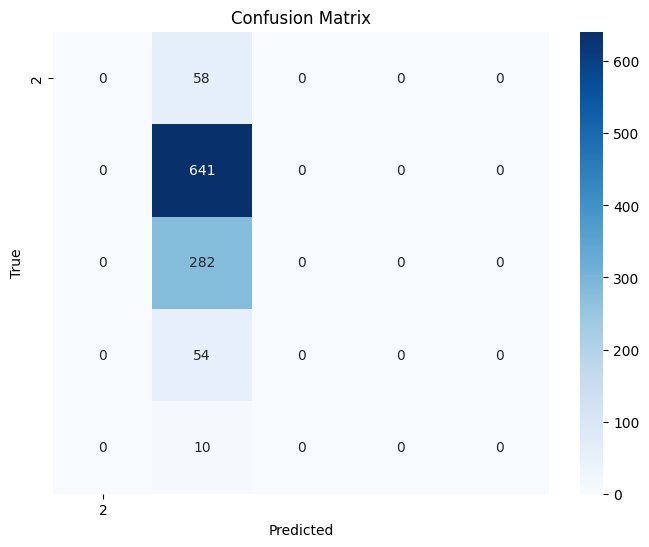

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6066411238825032
precision on train set:  0.3680134531854266
recall on train set:  0.6066411238825032
f1 score on train set:  0.4581153161274865
balanced accuracy on train set:  0.2
logistic loss on train set:  0.0170526777509965
mse on train set:  0.6235632183908046

Scorecard table:
         Feature    Weight
0  featSex-bin-1  0.485708
1   featSex-bin1  0.000000
2   featSex-bin2  0.000000
           Feature  Weight
3  featLength-bin1     0.0
4  featLength-bin2     0.0
5  featLength-bin3     0.0
6  featLength-bin4     0.0
7  featLength-bin5     0.0
8  featLength-bin6     0.0
              Feature  Weight
9   featDiameter-bin1     0.0
10  featDiameter-bin2     0.0
11  featDiameter-bin3     0.0
12  featDiameter-bin4     0.0
13  featDiameter-bin5     0.0
14  featDiameter-bin6     0.0

In [9]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_beyondl1_model, abalone_caim_1ook_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                    K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6171774920892122
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  mean score: 0.6171774920892122
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6171774920892122
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  mean score: 0.6171774920892122
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6171774920892122
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  mean score: 0.6171774920892122
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
AdaptiveLasso infeasible: minimize 4.99001996007984e-05 @ quad_over_lin([[1.00 0.00 ... 0.00 0.00]
 [1.00 0.00 ... 0.00 0.00]
 ...


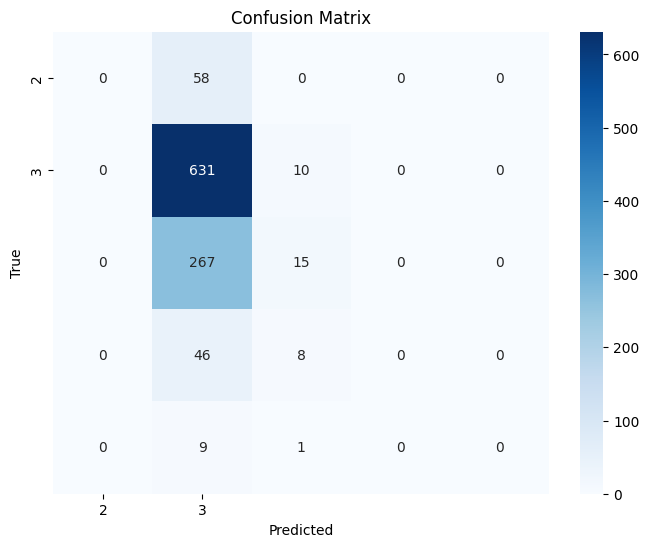

accuracy for class 1: 0.000
accuracy for class 2: 0.984
accuracy for class 3: 0.053
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6149425287356322
precision on train set:  0.5108652185671654
recall on train set:  0.6149425287356322
f1 score on train set:  0.49024826253172105
balanced accuracy on train set:  0.2084196553330228
logistic loss on train set:  0.01689793767563327
mse on train set:  0.5791826309067688

Scorecard table:
         Feature    Weight
0  featSex-bin-1  0.479704
1   featSex-bin1  0.000000
2   featSex-bin2  0.000000
           Feature    Weight
3  featLength-bin1  0.108115
4  featLength-bin2  0.042569
5  featLength-bin3  0.098600
6  featLength-bin4  0.069271
7  featLength-bin5  0.052122
8  featLength-bin6  0.093707
              Feature    Weight
9   featDiameter-bin1  0.022742
10  featDiameter-bin2  0.062812
11  featDiameter-bin3  0.087913
12  featDiameter-bin4  0.106199
13  featDiameter-b

In [10]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_adaptivelasso_model, abalone_caim_1ook_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                    K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6503829279850804
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  mean score: 0.6503829279850804
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6803929661504909
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.6803929661504909
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.6503829279850804
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  mean score: 0.6503829279850804
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean

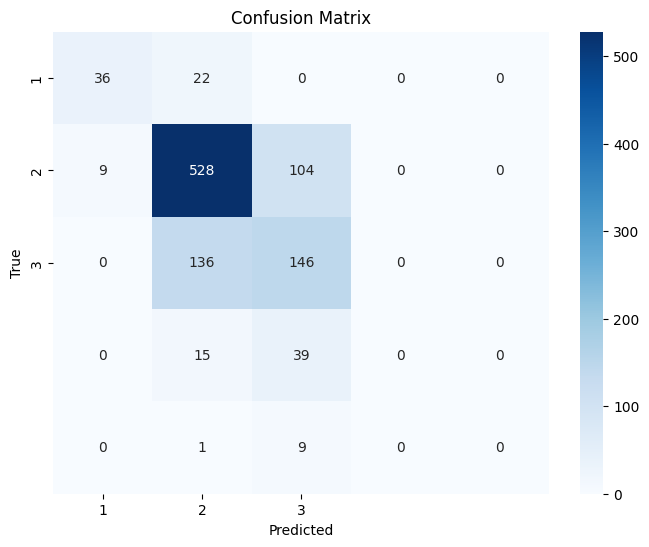

accuracy for class 1: 0.621
accuracy for class 2: 0.824
accuracy for class 3: 0.518
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6839080459770115
precision on train set:  0.6357061093236883
recall on train set:  0.6839080459770115
f1 score on train set:  0.6570405982690622
balanced accuracy on train set:  0.3904215859516385
logistic loss on train set:  0.020656979258409064
mse on train set:  0.3955938697318008

Scorecard table:
        Feature  Weight
0  featSex-bin1     0.0
1  featSex-bin2     0.0
           Feature    Weight
2  featLength-bin1 -0.201750
3  featLength-bin2 -0.081126
4  featLength-bin3  1.722504
5  featLength-bin4 -0.499133
6  featLength-bin5 -0.210000
7  featLength-bin6  0.000000
              Feature    Weight
8   featDiameter-bin1 -0.069230
9   featDiameter-bin2  0.569057
10  featDiameter-bin3  0.529723
11  featDiameter-bin4  0.240065
12  featDiameter-bin5 -0.200812
13  featDiameter-bin6 

In [11]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_ml_model, abalone_caim_diffcod_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params=None,
                use_sbc=True,
                K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.31384604409659056
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  mean score: 0.31384604409659056
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.3106531941238516
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  mean score: 0.3106531941238516
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  

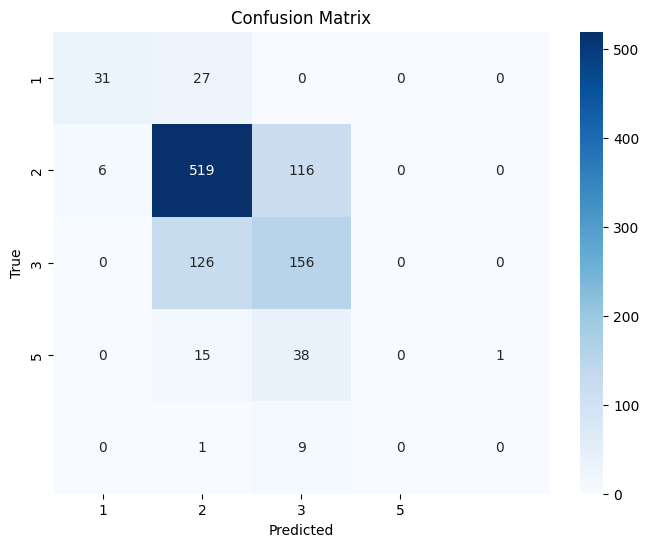

accuracy for class 1: 0.534
accuracy for class 2: 0.810
accuracy for class 3: 0.553
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6871008939974457
precision on train set:  0.6450560541219323
recall on train set:  0.6871008939974457
f1 score on train set:  0.6635670627933878
balanced accuracy on train set:  0.38970183142108467
logistic loss on train set:  0.01993064467631096
mse on train set:  0.3975095785440613

Scorecard table:
        Feature  Weight
0  featSex-bin1     0.0
1  featSex-bin2     0.0
           Feature        Weight
2  featLength-bin1  7.935341e-11
3  featLength-bin2 -1.997755e+00
4  featLength-bin3  1.998185e+00
5  featLength-bin4 -1.607194e-04
6  featLength-bin5 -1.224027e-04
7  featLength-bin6  0.000000e+00
              Feature        Weight
8   featDiameter-bin1  7.935341e-11
9   featDiameter-bin2  1.997848e+00
10  featDiameter-bin3  9.768958e-04
11  featDiameter-bin4  1.125263e-04
12  fe

In [12]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_mm_model, abalone_caim_diffcod_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 3.9433388710021973 seconds

Evaluating the model on the test set...
test predictions:  [ 1.07664895  0.47000625  0.18132461 ...  0.33735728  0.04867563
 -0.00587764]
      True Value  Prediction
0              2           2
1              2           2
2              4           2
3              2           2
4              3           2
...          ...         ...
1040           3           2
1041           2           2
1042           2           2
1043           2           2
1044           2           2

[1045 rows x 2 columns]
accuracy:  0.6133971291866028
precision:  0.376256038094366
recall:  0.6133971291866028
f1 score:  0.46641466169467666
balanced accuracy:  0.2
logistic loss:  0.018863768017011458
mse:  0.6181818181818182
number of far off predictions:  64
number of features:  47
number of non-zero weights:  7
model size (non-zero weights / all weights):  0.14893617021276595
test predictions:  [ 1.07664895  0.47000625  0.18132461 ...  0.33735728  0.04867563


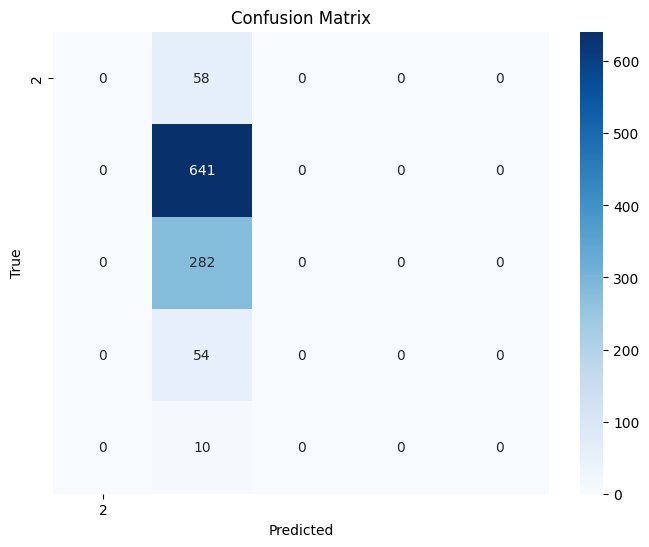

accuracy for class 1: 0.000
accuracy for class 2: 1.000
accuracy for class 3: 0.000
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6066411238825032
precision on train set:  0.3680134531854266
recall on train set:  0.6066411238825032
f1 score on train set:  0.4581153161274865
balanced accuracy on train set:  0.2
logistic loss on train set:  0.0170526777509965
mse on train set:  0.6235632183908046

Scorecard table:
        Feature  Weight
0  featSex-bin1     0.0
1  featSex-bin2     0.0
           Feature    Weight
2  featLength-bin1  0.000000
3  featLength-bin2  0.221989
4  featLength-bin3  0.000000
5  featLength-bin4  0.000000
6  featLength-bin5  0.000000
7  featLength-bin6  0.000000
              Feature  Weight
8   featDiameter-bin1     0.0
9   featDiameter-bin2     0.0
10  featDiameter-bin3     0.0
11  featDiameter-bin4     0.0
12  featDiameter-bin5     0.0
13  featDiameter-bin6     0.0
            Feature  

In [13]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_beyondl1_model, abalone_caim_diffcod_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.617816469724995
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  mean score: 0.617816469724995
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.617816469724995
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  mean score: 0.617816469724995
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.617816469724995
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  mean score: 0.617816469724995
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
AdaptiveLasso infeasible: minimize 4.988028731045491e-05 @ quad_over_lin([[0.00 0.00 ... 0.00 0.0

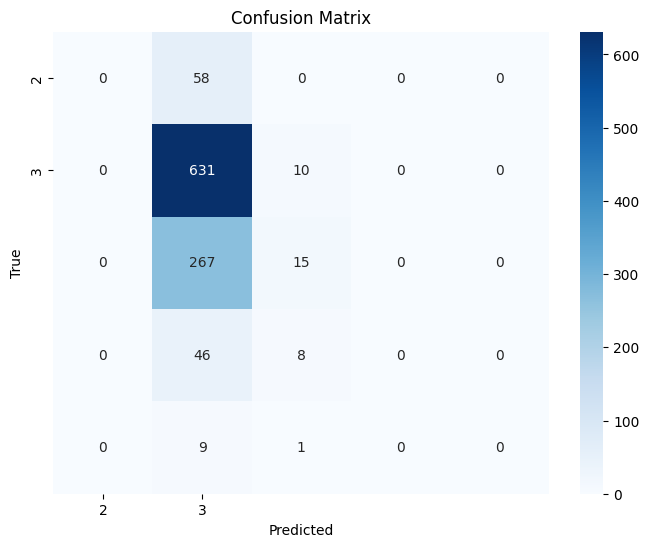

accuracy for class 1: 0.000
accuracy for class 2: 0.984
accuracy for class 3: 0.053
accuracy for class 4: 0.000
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.6149425287356322
precision on train set:  0.5108652185671654
recall on train set:  0.6149425287356322
f1 score on train set:  0.49024826253172105
balanced accuracy on train set:  0.2084196553330228
logistic loss on train set:  0.01689793767563327
mse on train set:  0.5791826309067688

Scorecard table:
        Feature  Weight
0  featSex-bin1     0.0
1  featSex-bin2     0.0
           Feature    Weight
2  featLength-bin1  0.090147
3  featLength-bin2 -0.065546
4  featLength-bin3  0.056031
5  featLength-bin4 -0.029328
6  featLength-bin5 -0.017149
7  featLength-bin6  0.023194
              Feature    Weight
8   featDiameter-bin1  0.090147
9   featDiameter-bin2  0.040070
10  featDiameter-bin3  0.025102
11  featDiameter-bin4  0.018286
12  featDiameter-bin5 -0.017297
13  featDiameter-bin6 

In [14]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcod_adaptivelasso_model, abalone_caim_diffcod_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.5555609907720216
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  mean score: 0.5555609907720216
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.5488532542509337
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.5488532542509337
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.5750406367356089
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  mean score: 0.5750406367356089
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean

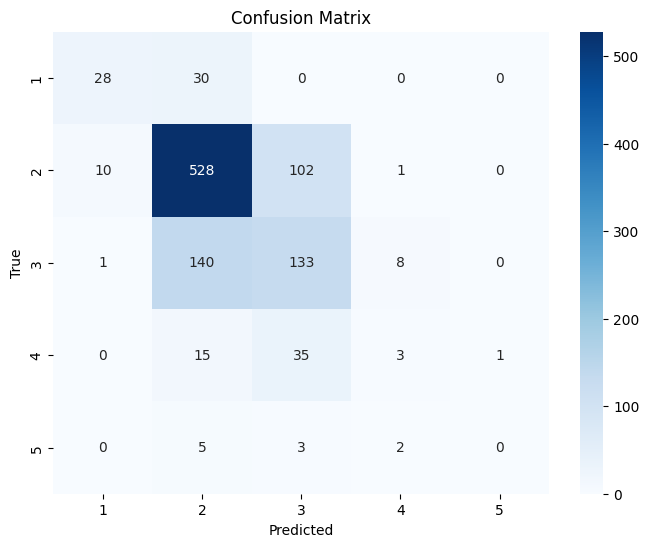

accuracy for class 1: 0.483
accuracy for class 2: 0.824
accuracy for class 3: 0.472
accuracy for class 4: 0.056
accuracy for class 5: 0.000

Evaluating the model on the train set...
accuracy on train set:  0.7723499361430396
precision on train set:  0.7548114642969731
recall on train set:  0.7723499361430396
f1 score on train set:  0.7569125616172172
balanced accuracy on train set:  0.4761884101254961
logistic loss on train set:  0.021139165305094725
mse on train set:  0.22956577266922096

Scorecard table:
         Feature    Weight
0  featSex-bin-1  1.802444
1   featSex-bin1  0.000000
2   featSex-bin2  0.000000
               Feature    Weight
3      featLength-bin1  0.000000
4     featLength-bin10  0.000000
5    featLength-bin100  0.375385
6    featLength-bin101  0.193685
7    featLength-bin102  0.023057
..                 ...       ...
129   featLength-bin95  0.000000
130   featLength-bin96  0.090146
131   featLength-bin97 -0.391851
132   featLength-bin98  0.000000
133   featLength-

In [15]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_ml_model, abalone_infbins_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()
 
scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_mm_model, abalone_infbins_1ook_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.2886237522356574
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  mean score: 0.2886237522356574
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  mean score: 0.041823481154236154
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3
  fold  4
  fold  4
  fold  5
  fold  5
  mean score: 0.2886237522356574
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  mean score: 0.2886237522356574
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  2
  fold  3
  fold  3


In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_beyondl1_model, abalone_infbins_1ook_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                    params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_adaptivelasso_model, abalone_infbins_1ook_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_ml_model, abalone_infbins_diffcod_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ML',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_mm_model, abalone_infbins_diffcod_mm_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='MM',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_beyondl1_model, abalone_infbins_diffcod_beyondl1_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='BEYOND_L1',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_diffcod_adaptivelasso_model, abalone_infbins_diffcod_adaptivelasso_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                 thresholds_method='INF_BINS',
                 encoding_method='DIFF_CODING',
                 model_method='ADAPTIVE_LASSO',
                 params=None,
                 use_sbc=True,
                 K=K)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## balance scale
classify each example as having the balance scale tip to the right, tip to the left, or be balanced (from 1 to 5)

https://archive.ics.uci.edu/dataset/12/balance+scale

#### load dataset

In [ ]:
# fetch dataset 
balance_scale_data = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
balance_scale_X = balance_scale_data.data.features 
balance_scale_y = balance_scale_data.data.targets 
  
# metadata 
print(balance_scale_data.metadata) 
  
# variable information 
print(balance_scale_data.variables) 

balance_scale_y  = pd.Series(balance_scale_y['class'], name='class')
print(balance_scale_y.value_counts())
balance_scale_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = balance_scale_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    balance_scale_X.loc[:, col] = balance_scale_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {balance_scale_X[col].unique()}")
    
mapping = {1: 'L', 2: 'B', 3: 'R'}

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_ml_model, balance_caim_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ML',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_mm_model, balance_caim_1ook_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='MM',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_beyondl1_model, balance_caim_1ook_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='BEYOND_L1',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_1ook_adaptivelasso_model, balance_caim_1ook_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                 thresholds_method='CAIM',
                 encoding_method='1_OUT_OF_K',
                 model_method='ADAPTIVE_LASSO',
                 use_sbc=True,
                 mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_ml_model, balance_caim_diffcod_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_mm_model, balance_caim_diffcod_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_beyondl1_model, balance_caim_diffcod_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_caim_diffcod_adaptivelasso_model, balance_caim_diffcod_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_ml_model, balance_infbins_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ML',
                    use_sbc=True,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_mm_model, balance_infbins_1ook_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='MM',
                    use_sbc=True,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_beyondl1_model, balance_infbins_1ook_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='BEYOND_L1',
                    use_sbc=True,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_1ook_adaptivelasso_model, balance_infbins_1ook_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                    thresholds_method='INF_BINS',
                    encoding_method='1_OUT_OF_K',
                    model_method='ADAPTIVE_LASSO',
                    use_sbc=True,
                    mapping=mapping)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_ml_model, balance_infbins_diffcod_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_mm_model, balance_infbins_diffcod_mm_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_beyondl1_model, balance_infbins_diffcod_beyondl1_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_infbins_diffcod_adaptivelasso_model, balance_infbins_diffcod_adaptivelasso_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## lenses

classes:
- 1 : the patient should be fitted with hard contact lenses,
- 2 : the patient should be fitted with soft contact lenses,
- 3 : the patient should not be fitted with contact lenses.


https://archive.ics.uci.edu/dataset/58/lenses

#### load dataset

In [ ]:
# fetch dataset 
lenses_data = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
lenses_X = lenses_data.data.features 
lenses_y = lenses_data.data.targets
  
# metadata 
print(lenses_data.metadata) 
  
# variable information 
print(lenses_data.variables) 

lenses_y  = pd.Series(lenses_y['class'], name='class')
print(lenses_y.value_counts())
lenses_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = lenses_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    lenses_X.loc[:, col] = lenses_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {lenses_X[col].unique()}")

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_ml_model, lenses_caim_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_mm_model, lenses_caim_1ook_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_beyondl1_model, lenses_caim_1ook_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_adaptivelasso_model, lenses_caim_1ook_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_ml_model, lenses_caim_diffcod_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_mm_model, lenses_caim_diffcod_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_beyondl1_model, lenses_caim_diffcod_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcod_adaptivelasso_model, lenses_caim_diffcod_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_ml_model, lenses_infbins_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_mm_model, lenses_infbins_1ook_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_beyondl1_model, lenses_infbins_1ook_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_adaptivelasso_model, lenses_infbins_1ook_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_ml_model, lenses_infbins_diffcod_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_mm_model, lenses_infbins_diffcod_mm_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_beyondl1_model, lenses_infbins_diffcod_beyondl1_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcod_adaptivelasso_model, lenses_infbins_diffcod_adaptivelasso_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## student performance
predict student performance in secondary education (high school)

https://archive.ics.uci.edu/dataset/320/student+performance

#### load dataset

In [ ]:
# fetch dataset 
student_performance_data = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
student_performance_X = student_performance_data.data.features 
student_performance_y = student_performance_data.data.targets 
# delete targets 'G1' and 'G2'
student_performance_y = student_performance_y.drop(columns=['G1', 'G2'])

# make classes
student_performance_y = student_performance_y['G3'].apply(
    lambda x: 'low' if x < 10 else ('medium' if x < 14 else ('good' if x < 18 else 'very good'))
)

# metadata 
# print(student_performance_data.metadata) 
  
# variable information 
# print(student_performance_data.variables) 

student_performance_y = pd.Series(student_performance_y)
print(student_performance_y.value_counts())
student_performance_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')


# num of observations
num_observations = len(student_performance_X)
print(f'Number of observations: {num_observations}')

# num of features
num_features = len(student_performance_X.columns)
print(f'Number of features: {num_features}')

# number of target classes
num_classes = len(student_performance_y.unique())
print(f'Number of target classes: {num_classes}')

In [ ]:
categorical_columns = student_performance_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    student_performance_X.loc[:, col] = student_performance_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {student_performance_X[col].unique()}")

mapping = {'low': 1, 'medium': 2, 'good': 3, 'very good': 4}

#### CAIM & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_ml_model, student_caim_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_mm_model, student_caim_1ook_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_beyondl1_model, student_caim_1ook_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_1ook_adaptivelasso_model, student_caim_1ook_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### CAIM & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_ml_model, student_caim_diffcod_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_mm_model, student_caim_diffcod_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_beyondl1_model, student_caim_diffcod_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_caim_diffcod_adaptivelasso_model, student_caim_diffcod_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & 1ook

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_ml_model, student_infbins_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_mm_model, student_infbins_1ook_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_beyondl1_model, student_infbins_1ook_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_1ook_adaptivelasso_model, student_infbins_1ook_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_ml_model, student_infbins_diffcod_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_mm_model, student_infbins_diffcod_mm_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_beyondl1_model, student_infbins_diffcod_beyondl1_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_infbins_diffcod_adaptivelasso_model, student_infbins_diffcod_adaptivelasso_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=True,
                mapping=mapping)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")